In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
# import module
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #Standarization
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.2.6
pandas version :  2.3.3
seaborn version :  0.13.2


In [8]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# **Exploratory Data Analysis (EDA)**
---


## 1. Data overview

In [9]:
# df=pd.read_csv("C:\one drive\Dokumen\Rakamin_project\employee_churn_prediction_updated (1).csv")
df=pd.read_csv("employee_churn_prediction_updated.csv")
df.head()

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,work_location,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,churn_period
0,1,28,Male,High School,0,153,0.94,62,9,4667108,0.03,4,Suburban,3,2.8,0,Married,22,Stayed
1,2,41,Male,Diploma,6,188,0.54,55,8,5853507,0.06,3,Urban,3,2.7,1,Single,36,Onboarding
2,3,36,Female,High School,8,159,0.44,59,10,4781336,0.07,1,Urban,2,1.7,1,Single,17,Onboarding
3,4,32,Male,Diploma,7,185,0.66,68,15,3624588,0.05,1,Urban,2,0.5,1,Married,32,Onboarding
4,5,29,Female,High School,7,142,1.01,45,9,5154327,0.08,3,Rural,2,4.5,0,Single,14,Stayed


Melakukan data load "employee_churn_prediction_updated.csv" dan inisiasikan dalam bentuk df

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

In [11]:
# Menghitung jumlah data kosong di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan jumlah data kosong
print("Jumlah data kosong per kolom:")
print(missing_values)

Jumlah data kosong per kolom:
employee_id                0
age                        0
gender                     0
education                  0
experience_years           0
monthly_target             0
target_achievement         0
working_hours_per_week     0
overtime_hours_per_week    0
salary                     0
commission_rate            0
job_satisfaction           0
work_location              0
manager_support_score      0
company_tenure_years       0
churn                      0
marital_status             0
distance_to_office_km      0
churn_period               0
dtype: int64


Kolom Data terdiri dari (19 kolom, 1000 baris):

* **employee_id** : ID unik karyawan *(int)*.
* **age** : Usia karyawan *(int)*.
* **gender** : Jenis kelamin karyawan *(teks)*.
* **experience_years** : Total tahun pengalaman kerja *(teks)*.
* **monthly_target** : Target bulanan karyawan *(float)*.
* **target_achievement** : Pencapaian target *(float)*.
* **working_hours_per_week** : Jam kerja per minggu *(int)*.
* **overtime_hours_per_week** : Jam lembur per minggu *(int)*.
* **salary** : Gaji pokok *(int)*.
* **commission_rate** : Rate komisi *(float)*.
* **job_satisfaction** : Tingkat kepuasan kerja *(teks)*.
* **work_location** : Lokasi kerja *(teks)*.
* **manager_support_score** : Skor dukungan manajer *(float)*.
* **company_tenure_years** : Masa kerja di perusahaan *(float)*.
* **churn** : Status churn *(teks: Ya/Tidak)*.
* **marital_status** : Status pernikahan *(teks)*.
* **distance_to_office_km** : Jarak rumah ke kantor (km) *(teks)*.
* **churn_period** : Periode churn *(teks)*.

     
Catatan: Semua kolom memiliki 1000 entri non-null. Tipe data campuran:
* float : 13 kolom  
* int : 11 kolom  
* object (teks/string) : 5 kolom

>Semua kolom memiliki 0 nilai kosong → data bersih secara struktural.
     

In [12]:
df['employee_id'].duplicated().sum()

np.int64(0)

>Tidak ada ID karyawan yang terduplikasi. Setiap employee_id unik.

In [13]:
df.duplicated().sum()

np.int64(0)

>Tidak ada baris data (row) yang benar-benar identik secara keseluruhan.

In [14]:
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,work_location,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,churn_period


>Hasil: Tidak ada baris duplikat — semua baris unik.

## 2. Anomali data


**Pengecekan pada usia > pengalaman kerja**

Karyawan tidak mungkin memiliki pengalaman kerja lebih dari usianya dikurangi 18 tahun (asumsi mulai kerja di usia 17+).

In [15]:
# Flag anomali: pengalaman > (usia - 18)
anomaly_experience = df['experience_years'] > (df['age'] - 18)
anomaly_experience.value_counts()

False    926
True      74
Name: count, dtype: int64

Hasil:   
- False: 926 baris → tidak anomali (logis).  
- True: 74 baris → anomali terdeteksi (pengalaman > usia - 18)
     

In [16]:
anomalies = df[anomaly_experience & df['experience_years'].notna() & df['age'].notna()]
anomalies[['employee_id', 'age', 'experience_years']]

,employee_id,age,experience_years
17,18,23,8
20,21,23,7
35,36,24,7
70,71,23,7
90,91,22,9
...,...,...,...
959,960,22,7
968,969,22,8
981,982,22,6
982,983,26,9


In [17]:
df = df[~anomaly_experience].copy()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 0 to 998
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              926 non-null    int64  
 1   age                      926 non-null    int64  
 2   gender                   926 non-null    object 
 3   education                926 non-null    object 
 4   experience_years         926 non-null    int64  
 5   monthly_target           926 non-null    int64  
 6   target_achievement       926 non-null    float64
 7   working_hours_per_week   926 non-null    int64  
 8   overtime_hours_per_week  926 non-null    int64  
 9   salary                   926 non-null    int64  
 10  commission_rate          926 non-null    float64
 11  job_satisfaction         926 non-null    int64  
 12  work_location            926 non-null    object 
 13  manager_support_score    926 non-null    int64  
 14  company_tenure_years     926 no

**Memeriksa inkonsistensi data churn**

In [19]:
inconsistent = df[
    ((df['churn'] == 0) & (df['churn_period'] != 'Stayed')) |
    ((df['churn'] == 1) & (df['churn_period'] == 'Stayed'))
]
print(f"Baris tidak konsisten: {len(inconsistent)}")

Baris tidak konsisten: 0


> terlihat bahwa kolom churn dan churn_period selaras dan tidak ada inkonsistensi data

**Membagi kolom berdasarkan tipe data nya**

In [20]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
datetime_cols= df.select_dtypes(include=['datetime64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number, 'datetime64']).columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()
# --- Cetak hasilnya dengan format rapi ---
print("Kolom Numerik  :", numerical_cols)
print("Kolom bool:", bool_cols)
print("Kolom Kategorik:", categorical_cols)
print("Kolom Datetime :", datetime_cols)

Kolom Numerik  : ['employee_id', 'age', 'experience_years', 'monthly_target', 'target_achievement', 'working_hours_per_week', 'overtime_hours_per_week', 'salary', 'commission_rate', 'job_satisfaction', 'manager_support_score', 'company_tenure_years', 'churn', 'distance_to_office_km']
Kolom bool: []
Kolom Kategorik: ['gender', 'education', 'work_location', 'marital_status', 'churn_period']
Kolom Datetime : []


> memisah data 'Numerik' & 'kategorik'

## 3. Statistics

In [21]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,926.0,5.041220e+02,2.884973e+02,1.00,256.25,507.50,753.75,999.0
age,926.0,3.361123e+01,6.530928e+00,22.00,28.00,34.00,39.00,44.0
experience_years,926.0,4.240821e+00,2.834402e+00,0.00,2.00,4.00,7.00,9.0
monthly_target,926.0,1.254622e+02,4.389196e+01,50.00,86.00,127.00,163.75,199.0
target_achievement,926.0,7.907775e-01,2.282640e-01,0.40,0.59,0.79,0.99,1.2
working_hours_per_week,926.0,5.415335e+01,8.682398e+00,40.00,46.00,54.00,62.00,69.0
overtime_hours_per_week,926.0,9.429806e+00,5.722118e+00,0.00,5.00,9.00,14.00,19.0
salary,926.0,5.501960e+06,1.442609e+06,3000037.00,4253052.00,5492408.00,6749479.50,7999712.0
commission_rate,926.0,5.879050e-02,2.323663e-02,0.02,0.04,0.06,0.08,0.1
job_satisfaction,926.0,2.514039e+00,1.121446e+00,1.00,2.00,3.00,4.00,4.0


- employee_id: Unik, rentang 1–1000
- age: Rata-rata 32.8 tahun, min 22, max 44 → usia kerja produktif.
- experience_years: Rata-rata 4.5 tahun, max 9 → sebagian besar karyawan berpengalaman muda.
- monthly_target: Rata-rata 125.9, max 199 → target bulanan cukup tinggi.
- target_achievement: Rata-rata 0.79 → rata-rata pencapaian target 79%.
- working_hours_per_week: Rata-rata 54 jam, max 69 → banyak lembur.
- overtime_hours_per_week: Rata-rata 9.5 jam, max 19 → lembur signifikan di beberapa kasus.
- salary: Rata-rata ~5.4 juta, max ~7.9 juta → variasi gaji normal.
- commission_rate: Rata-rata 5.8%, max 10% → komisi rendah hingga sedang.
- job_satisfaction & manager_support_score: Skala 1–5 → rata-rata sekitar 2.5 → kepuasan dan dukungan manajer cenderung rendah.
- company_tenure_years: Rata-rata 0.63 tahun, max 5 → banyak karyawan baru.
- churn: Rata-rata 0.629 → 63% churn rate (biner: 0/1). → sangat tinggi
- distance_to_office_km: Rata-rata 24 km, max 49 km → jarak cukup jauh untuk beberapa karyawan. <br><br>

Pola menunjukkan potensi tekanan kerja (jam kerja tinggi, kepuasan rendah) — relevan untuk prediksi churn.
         

     

In [22]:
df[categorical_cols].describe()

,gender,education,work_location,marital_status,churn_period
count,926,926,926,926,926
unique,2,3,3,2,4
top,Male,Diploma,Urban,Single,Stayed
freq,648,378,458,557,341


- gender: 2 kategori → Male (703), Female (297) — dominan pria.
- education: 3 kategori → Diploma (404) paling umum, disusul S1/S2 dan lainnya.
- work_location: 3 kategori → Urban (500) = 50% — Urban mendominasi.
- marital_status: 2 kategori → Single (606) > Married (394).
- churn_period: 4 kategori → Stayed (371) paling banyak — artinya 629 karyawan churn di periode tertentu.
         
     

In [23]:
df[categorical_cols].value_counts()

gender  education    work_location  marital_status  churn_period
Male    Diploma      Urban          Single          Stayed          35
        High School  Urban          Single          Stayed          24
        Diploma      Suburban       Single          Stayed          21
                     Urban          Single          1 Month         20
                                    Married         Stayed          20
                                                                    ..
Female  High School  Urban          Married         3 Months         1
                     Suburban       Married         3 Months         1
        Diploma      Rural          Married         Onboarding       1
        High School  Suburban       Married         Stayed           1
                     Urban          Married         Stayed           1
Name: count, Length: 140, dtype: int64

In [24]:
# menampilkan nilai unique 'kategorik'
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in 'gender':
['Male' 'Female']
------------------------------
Unique values in 'education':
['High School' 'Diploma' 'Bachelor']
------------------------------
Unique values in 'work_location':
['Suburban' 'Urban' 'Rural']
------------------------------
Unique values in 'marital_status':
['Married' 'Single']
------------------------------
Unique values in 'churn_period':
['Stayed' 'Onboarding' '1 Month' '3 Months']
------------------------------


- gender → 'Male', 'Female' — hanya dua jenis kelamin.
- education → 'High School', 'Diploma', 'Bachelor' — tingkat pendidikan standar.
- work_location → 'Suburban', 'Urban', 'Rural' — lokasi kerja berdasarkan wilayah.
- marital_status → 'Married', 'Single' — status pernikahan sederhana.
- churn_period → 'Stayed', 'Onboarding', '1 Month', '3 Months' — periode churn atau bertahan.
     

## 4. Graphics

**Visualisasi dengan box plot**

Boxplot adalah alat visual yang efektif untuk menilai distribusi dan identifikasi outlier secara statistik, karena:
1. Menunjukkan spread data & titik ekstrem
2. Membantu memutuskan apakah outlier perlu ditangani
3. Mendeteksi bias atau ketidakwajaran sistemik
4. Mendukung keputusan preprocessing

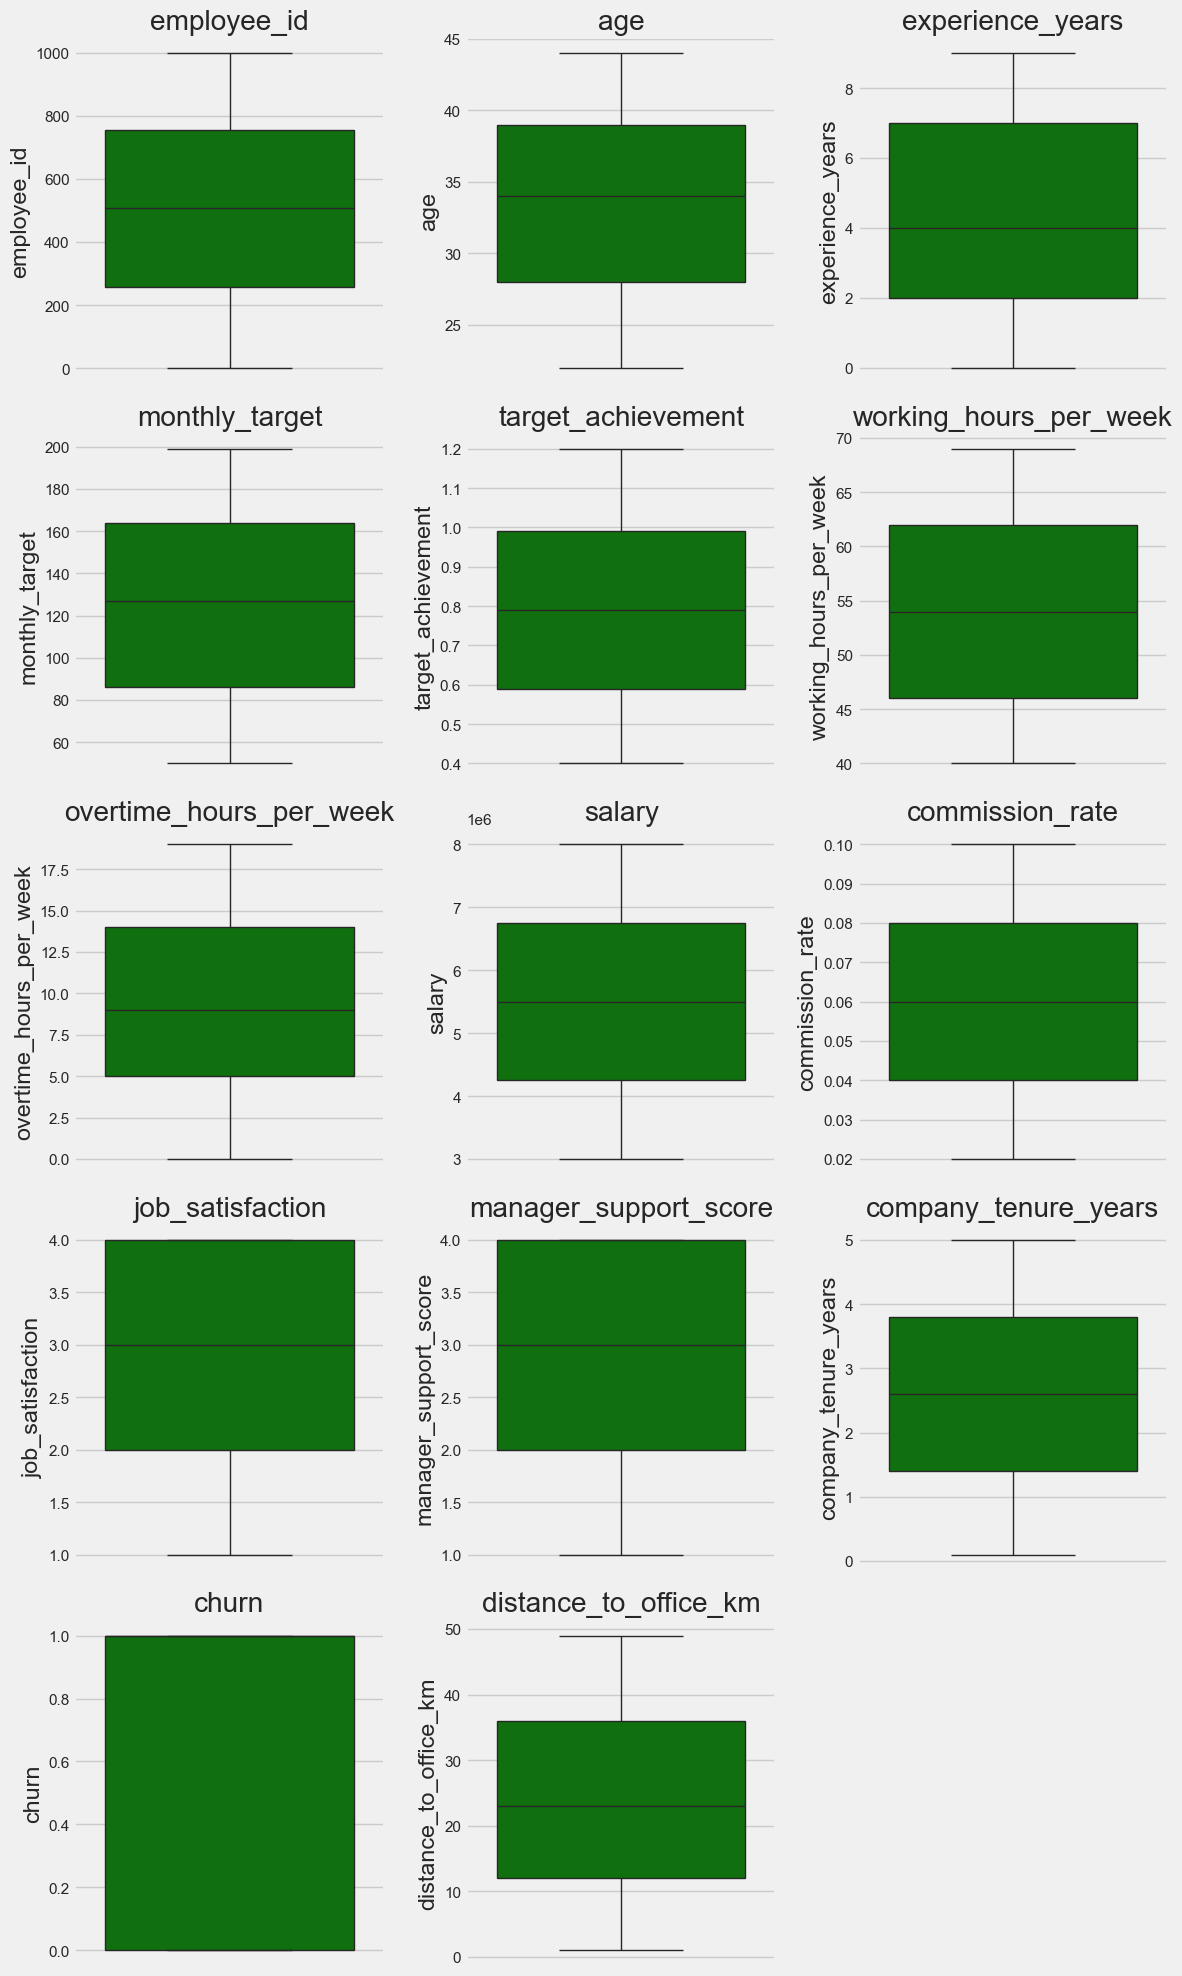

In [25]:
import math

num_cols = numerical_cols
n = len(num_cols)

rows = math.ceil(n/3)
cols = 3

plt.figure(figsize=(12, 4*rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=df[col], color='green')
    plt.title(col)

plt.tight_layout()
plt.show()


1. Semua data Stabil & Tidak Ada Outlier
- Mayoritas fitur numerik (age, experience_years, target_achievement, job_satisfaction, dll) menunjukkan distribusi yang wajar — tidak ada outlier yang mengganggu.
- Ini berarti tidak perlu transformasi drastis sebelum modeling.

2. Variabel Target (churn) Imbalanced
- Boxplot menunjukkan mayoritas karyawan tidak churn (0) → perlu teknik balancing saat modeling (SMOTE, class weight, dll).
     

     

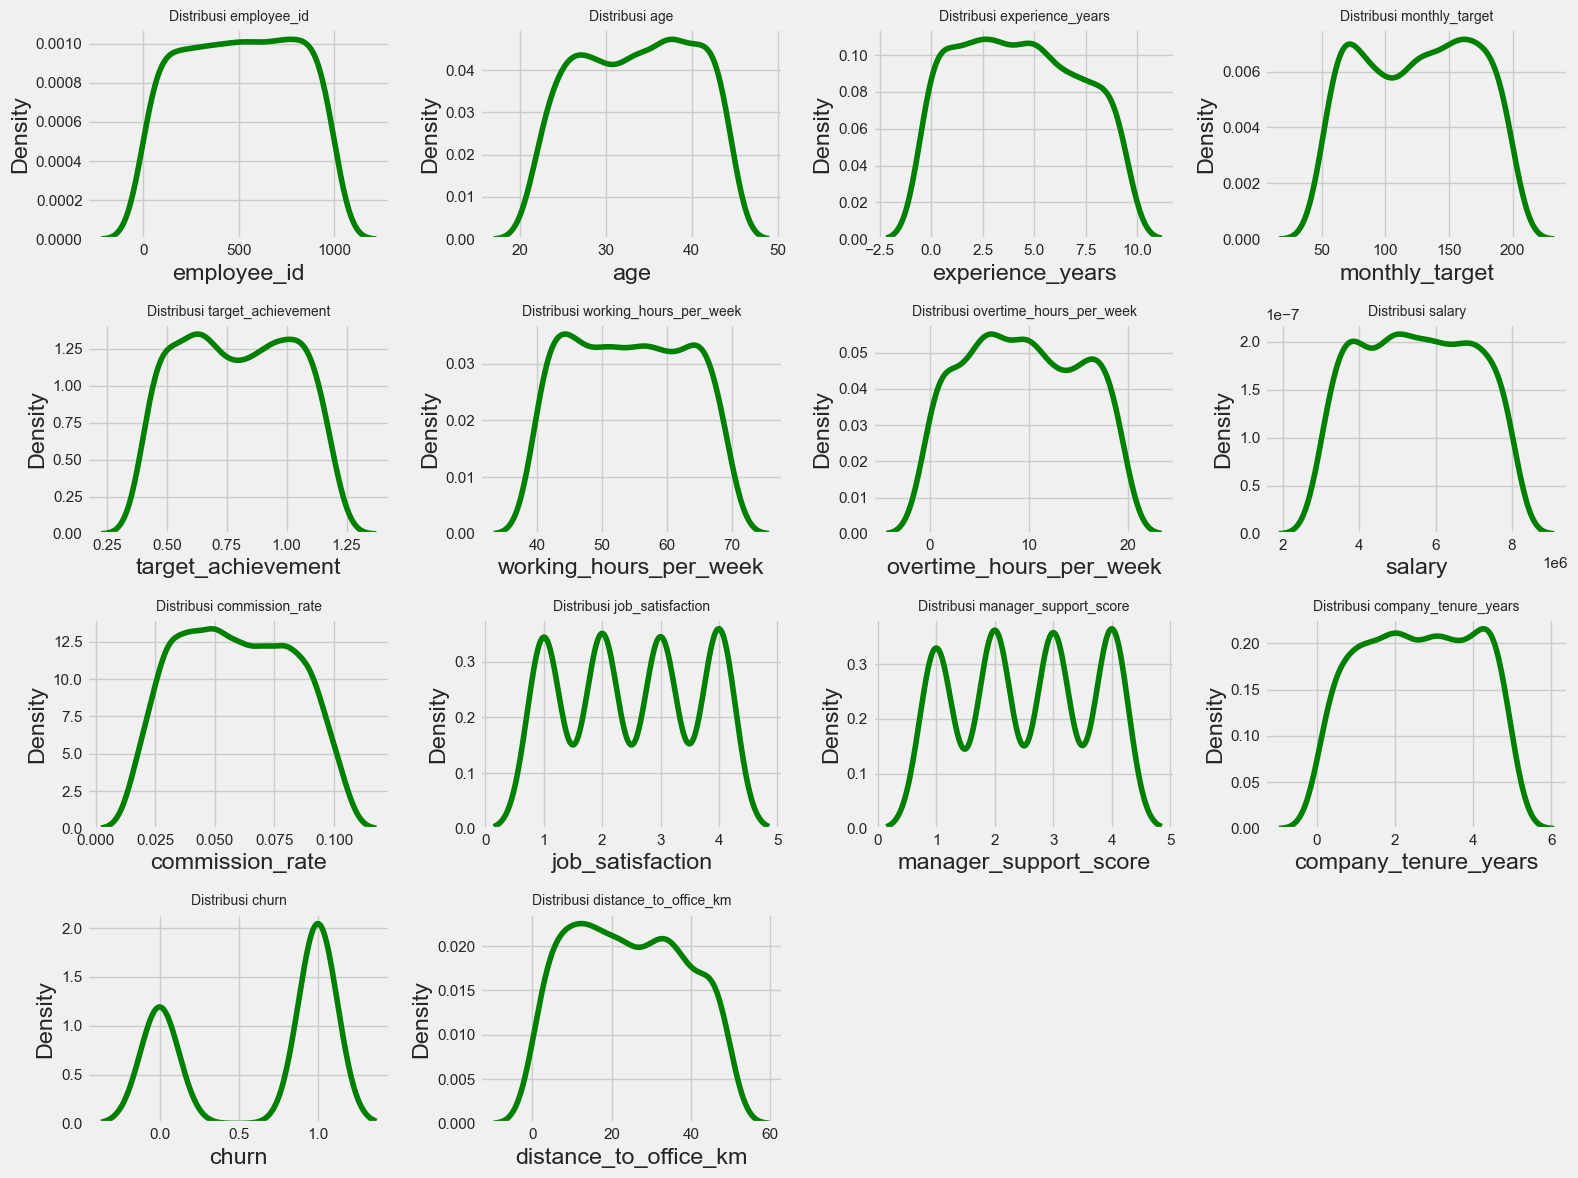

In [26]:
plt.figure(figsize=(16, 12)) # Increased figure size for a 4x4 grid
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i) # Changed subplot grid to 4x4
    sns.kdeplot(df[col], color='green')
    plt.title(f'Distribusi {col}', fontsize=10)
plt.tight_layout()
plt.show()

1. Mayoritas Fitur Berdistribusi Normal atau Mendekati Normal
- age, experience_years, monthly_target, working_hours_per_week, salary, company_tenure_years → bentuk kurva simetris.
- Ini menandakan data cukup stabil dan representatif — tidak ada distorsi ekstrem.

2. target_achievement Terkonsentrasi di Atas 0.5 — Banyak Karyawan Capai Target
- Puncak di sekitar 0.8 → rata-rata pencapaian target tinggi.
- Tapi: Masih ada ekor ke kiri (nilai < 0.5)

3. distance_to_office_km Punya Ekstrem di 0–10 km, Lalu Turun Bertahap
- Mayoritas karyawan tinggal dekat (≤20 km), tapi ada yang sangat jauh (sampai 60 km).
>Jarak > 30 km bisa jadi faktor penambah beban — terutama jika dikombinasikan dengan jam kerja panjang.  

4. churn Menunjukkan Imbalance yang Jelas
- Dua puncak tajam di 0 dan 1 → mayoritas karyawan tidak churn (0), minoritas churn (1).
> Ini memperkuat kebutuhan teknik class balancing saat modeling (SMOTE, class_weight, dll).  

     

     
     
     

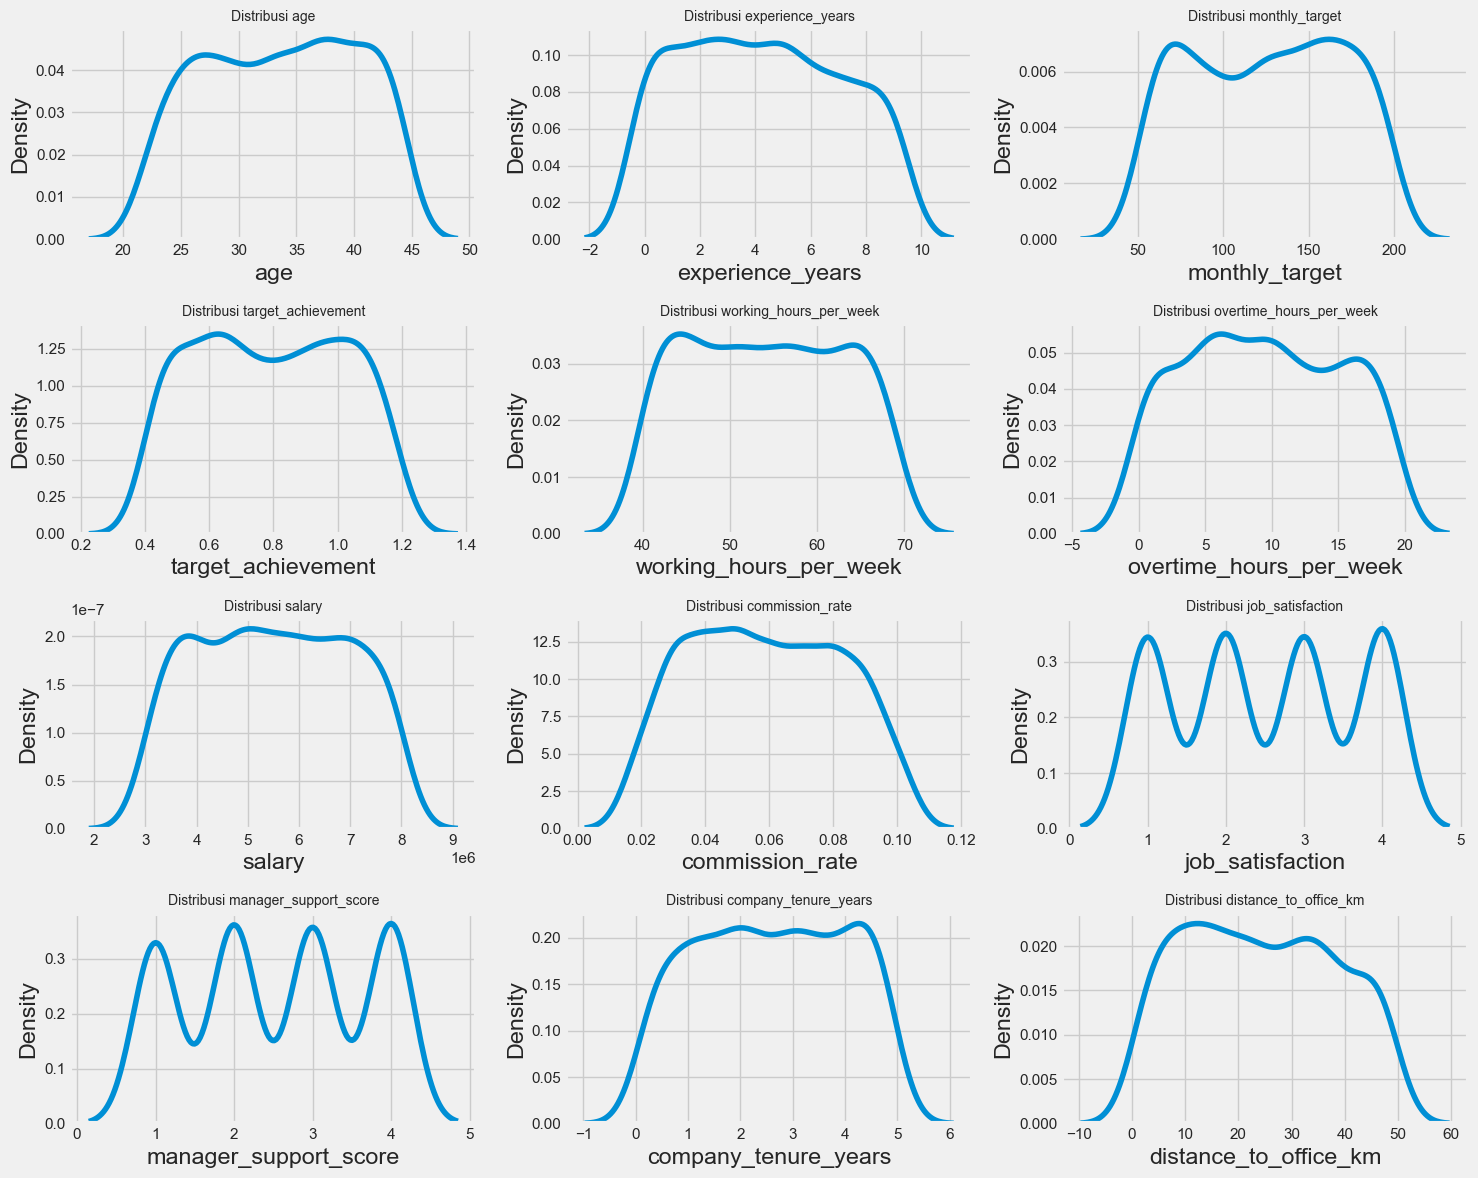

In [27]:
# Daftar kolom yang ingin ditampilkan (sesuai gambar)
columns_to_plot = [
    'age',
    'experience_years',
    'monthly_target',
    'target_achievement',
    'working_hours_per_week',
    'overtime_hours_per_week',
    'salary',
    'commission_rate',
    'job_satisfaction',
    'manager_support_score',
    'company_tenure_years',
    'distance_to_office_km'
]

# Buat plot dengan ukuran figure yang cukup untuk 4x3 grid
plt.figure(figsize=(15, 12))  # Ukuran disesuaikan agar tidak terlalu sempit

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  # Grid 4 baris x 3 kolom
    sns.kdeplot(df[col])  # Tambahkan fill=True untuk tampilan lebih mirip gambar
    plt.title(f'Distribusi {col}', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

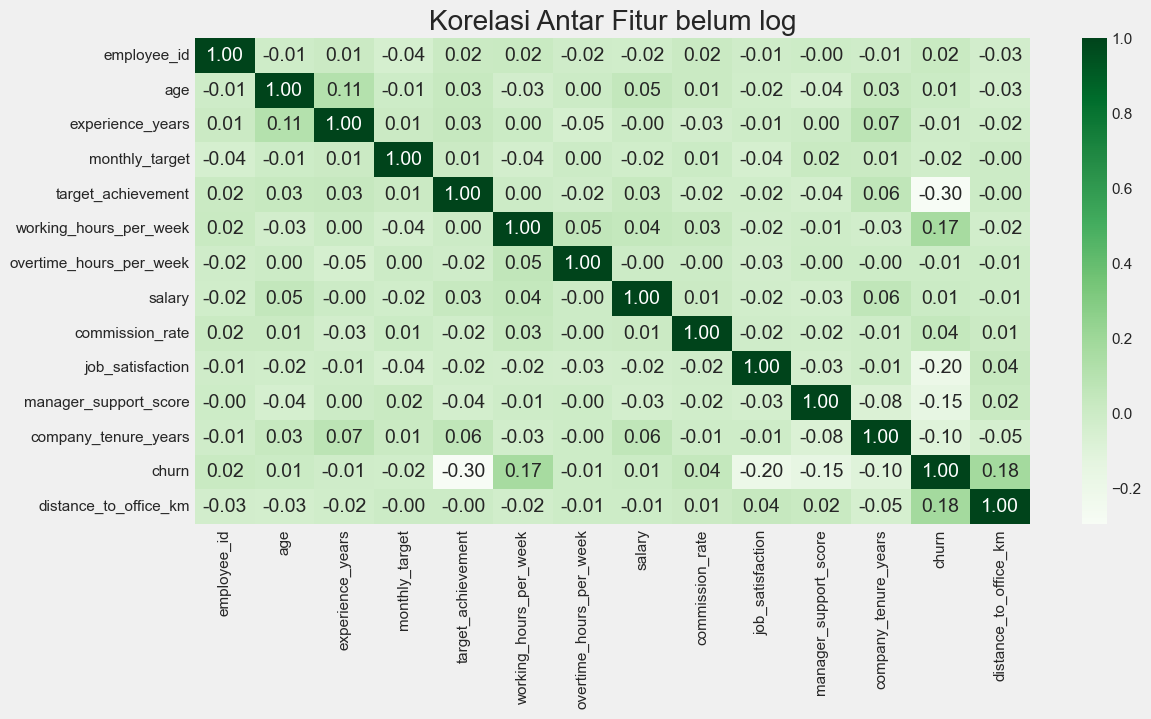

In [28]:
plt.figure(figsize=(12,6))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True, cmap='Greens', fmt=".2f")
plt.title('Korelasi Antar Fitur belum log')
plt.show()

1. Tidak Ada Multikolinearitas Tinggi
- Semua nilai korelasi berada di rentang -0.28 hingga +0.18
- Tidak perlu menghapus fitur karena korelasi tinggi → semua fitur bisa dipakai bersamaan tanpa risiko overfitting akibat redundansi

2. Hubungan dengan Target (churn) Sangat Lemah
- Korelasi tertinggi dengan churn hanya +0.18 (distance_to_office_km) dan -0.28 (target_achievement)
- Semakin rendah pencapaian target → semakin tinggi kemungkinan churn (korelasi negatif lemah).
- Semakin jauh jarak rumah ke kantor → semakin tinggi kemungkinan churn (korelasi positif lemah).

3. employee_id dan Variabel Lainnya Tidak Berkorelasi, bisa di-drop sebelum modeling (jika tidak digunakan untuk tracking)

4. Beberapa Pasangan Fitur Punya Korelasi Negatif
- "target_achievement vs churn": -0.28 → karyawan yang gagal capai target lebih mungkin churn.  
- "job_satisfaction vs churn": -0.21 → kepuasan rendah → risiko churn lebih tinggi.  
- "manager_support_score vs churn": -0.16 → dukungan manajer rendah → sedikit meningkatkan risiko churn.
     

In [29]:
# !pip install ydata-profiling

# import pandas as pd
# df = pd.read_csv("/content/drive/My Drive/Rakamin/Data science/Final Project/data set/employee_churn_prediction_updated.csv")
# profile = ProfileReport(df, title="Profiling Report", explorative=True)
# profile.to_file("profiling_report.html")

# **Feature Engineering**
---

In [30]:
df_original_sensitive = df[['gender', 'education', 'marital_status', 'work_location', 'age']].copy()

## Encoding & labeling

In [31]:
# Transform gender
df['gender_Male'] = (df['gender'] == 'Male').astype(int)
df['gender_Male'].head()

0    1
1    1
2    0
3    1
4    0
Name: gender_Male, dtype: int64

Transformasi Kolom gender → gender_Male (One-Hot Encoding Sederhana)
- 1 = Male,
- 0 = Female

> Tujuan: Mengubah variabel kategorikal (Male/Female) menjadi numerik biner (1/0) agar bisa diproses model ML.

In [32]:
# labeling aducation
edu_ordinal= {'High School': 0, 'Diploma': 1, 'Bachelor': 2}
df['education_ord'] = df['education'].map(edu_ordinal).astype(int)
df['education_ord'].unique()

array([0, 1, 2])

Labeling Kolom education → education_ord (Ordinal Encoding)  — sesuai urutan pendidikan formal.
- High School = 0,
- Diploma = 1,
- Bachelor = 2

>Tujuan: Mengubah tingkat pendidikan kategorikal menjadi angka berurutan yang mencerminkan hierarki (semakin tinggi = semakin besar nilainya).

In [33]:
# transform martial_status
df['is_married'] = (df['marital_status'] == 'Married').astype(int)
df['is_married'].head()

0    1
1    0
2    0
3    1
4    0
Name: is_married, dtype: int64

Transformasi marital_status → is_married (Binary Encoding)
- Single = 0
- Married = 1

> Tujuan: Mengubah status pernikahan kategorikal menjadi variabel biner (1 = Married, 0 = Single) agar bisa diproses model ML.

In [34]:
#df['churn_period_bin'] = (df['churn_period'] != 'Stayed').astype(int)
#1adf['churn_period_bin'].head()

In [35]:
# one-hot work_location
work_location_dummies = pd.get_dummies(df['work_location'], prefix='work_location', dtype=int)
df = pd.concat([df, work_location_dummies], axis=1)
display(df.head())

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,...,churn,marital_status,distance_to_office_km,churn_period,gender_Male,education_ord,is_married,work_location_Rural,work_location_Suburban,work_location_Urban
0,1,28,Male,High School,0,153,0.94,62,9,4667108,...,0,Married,22,Stayed,1,0,1,0,1,0
1,2,41,Male,Diploma,6,188,0.54,55,8,5853507,...,1,Single,36,Onboarding,1,1,0,0,0,1
2,3,36,Female,High School,8,159,0.44,59,10,4781336,...,1,Single,17,Onboarding,0,0,0,0,0,1
3,4,32,Male,Diploma,7,185,0.66,68,15,3624588,...,1,Married,32,Onboarding,1,1,1,0,0,1
4,5,29,Female,High School,7,142,1.01,45,9,5154327,...,0,Single,14,Stayed,0,0,0,1,0,0


**One-Hot Encoding** work_location → work_location_[Suburban/Urban/Rural]
-  Buat 3 kolom baru: work_location_Suburban, work_location_Urban, work_location_Rural.
- Setiap baris hanya punya satu nilai 1 (yang sesuai lokasinya), sisanya 0.

> Tujuan: Mengubah lokasi kerja kategorikal (non-hierarkis) menjadi kolom biner terpisah — karena tidak ada urutan antar lokasi.

## Penambahan fitur

In [36]:
# Memberi gambaran tentang tekanan kerja per minggu.
df['total_workload'] = (df['working_hours_per_week']) + (df['overtime_hours_per_week'])

# Karyawan yang melebihi target (>1.1) + lembur tinggi (>10 jam).
df['overachiever_high_overtime'] = (df['target_achievement'] > 1.1) & (df['overtime_hours_per_week'] > 10)

# Mengukur efisiensi — bukan hanya hasil, tapi seberapa hemat waktu mencapainya.
df['performance_efficiency'] = df['target_achievement'] / (df['total_workload'] + 1)

# Mengukur “nilai” gaji terhadap ekspektasi kerja — bisa jadi indikator ketidakpuasan.
df['salary_to_target_ratio'] = df['salary'] / (df['monthly_target'] + 1)

# Mengukur apakah gaji sebanding dengan pengalaman — relevan untuk churn karena ketidakadilan.
df['salary_per_exp'] = df['salary'] / (df['experience_years'] + 1)

# Mengukur beban logistik vs beban kerja — semakin tinggi, semakin tidak wajar.
df['long_distance_overwork'] = df['distance_to_office_km'] / (df['working_hours_per_week'] + 1)

# melihat segmen paling rentan churn — prioritas utama untuk intervensi bisnis.
df['high_overtime'] = (df['overtime_hours_per_week'] > df['overtime_hours_per_week'].median()).astype(int)
df['low_satisfaction'] = (df['job_satisfaction'] <= 2).astype(int)
df['high_ot_low_sat'] = df['high_overtime'] & df['low_satisfaction']

> IMPORTANT

In [37]:
q1 = df['age'].quantile(0.33)
q2 = df['age'].quantile(0.66)

# Membagi kelompok usia berdasarkan kuartil
df['age_group'] = pd.cut(df['age'], bins=[22, q1, q2, 44], labels=['Young', 'Middle', 'Senior'])

1. Encoding Variabel Kategorikal   
- gender → gender_Male (binary encoding: 1 = Male, 0 = Female)  
- marital_status → is_married (binary encoding: 1 = Married, 0 = Single)  
- education → education_ord (ordinal encoding: High School=0, Diploma=1, Bachelor=2)  
- work_location → one-hot encoded menjadi:  
  - work_location_Suburban  
  - work_location_Urban  
  - work_location_Rural

2. Fitur Numerik Gabungan   
- total_working_hour = working_hours_per_week + overtime_hours_per_week
         

3. Fitur Interaksi & Rasio (Domain-Driven)   
- overachiever_high_overtime = (target_achievement > 1.1) & (overtime_hours_per_week > 10)  
- performance_efficiency = target_achievement / (total_working_hour + 1)  
- salary_to_target_ratio = salary / (monthly_target + 1)  
- salary_per_exp = salary / (experience_years + 1)  
- long_distance_overwork = distance_to_office_km / (total_working_hour + 1)  
- high_ot_low_sat = (overtime_hours_per_week > median) & (job_satisfaction < 2)

>  Fitur Baru: 10 kolom tambahan
>- 4 dari encoding,
>- 1 dari penjumlahan
>- 5 dari interaksi/rasio/logika bisnis.
     

## Data Transformation Summary

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 0 to 998
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   employee_id                 926 non-null    int64   
 1   age                         926 non-null    int64   
 2   gender                      926 non-null    object  
 3   education                   926 non-null    object  
 4   experience_years            926 non-null    int64   
 5   monthly_target              926 non-null    int64   
 6   target_achievement          926 non-null    float64 
 7   working_hours_per_week      926 non-null    int64   
 8   overtime_hours_per_week     926 non-null    int64   
 9   salary                      926 non-null    int64   
 10  commission_rate             926 non-null    float64 
 11  job_satisfaction            926 non-null    int64   
 12  work_location               926 non-null    object  
 13  manager_support_score    

Perubahan Jumlah Kolom: Dari 19 → 34 Kolom

**Sebelumnya**: Dataset asli memiliki 19 kolom (berdasarkan output awal DataFrame).
**Sekarang**: Setelah preprocessing & feature engineering, total kolom menjadi 34.
     
>Jumlah Penambahan: +15 kolom

1. Encoding Kategorikal (+6 kolom)
- gender_Male → dari gender  
- is_married → dari marital_status  
- education_ord → dari education  
- work_location_Suburban, work_location_Urban, work_location_Rural → dari work_location (one-hot)
     
2. Fitur Gabungan (+1 kolom)
- total_working_hour = working_hours_per_week + overtime_hours_per_week

3. Fitur Interaksi & Logika Bisnis (+8 kolom)
- overachiever_high_overtime  
- performance_efficiency  
- salary_to_target_ratio  
- salary_per_exp  
- long_distance_overwork  
- high_ot_low_sat
     

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,926.0,5.041220e+02,2.884973e+02,1.000000e+00,2.562500e+02,5.075000e+02,7.537500e+02,9.990000e+02
age,926.0,3.361123e+01,6.530928e+00,2.200000e+01,2.800000e+01,3.400000e+01,3.900000e+01,4.400000e+01
experience_years,926.0,4.240821e+00,2.834402e+00,0.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,9.000000e+00
monthly_target,926.0,1.254622e+02,4.389196e+01,5.000000e+01,8.600000e+01,1.270000e+02,1.637500e+02,1.990000e+02
target_achievement,926.0,7.907775e-01,2.282640e-01,4.000000e-01,5.900000e-01,7.900000e-01,9.900000e-01,1.200000e+00
working_hours_per_week,926.0,5.415335e+01,8.682398e+00,4.000000e+01,4.600000e+01,5.400000e+01,6.200000e+01,6.900000e+01
overtime_hours_per_week,926.0,9.429806e+00,5.722118e+00,0.000000e+00,5.000000e+00,9.000000e+00,1.400000e+01,1.900000e+01
salary,926.0,5.501960e+06,1.442609e+06,3.000037e+06,4.253052e+06,5.492408e+06,6.749480e+06,7.999712e+06
commission_rate,926.0,5.879050e-02,2.323663e-02,2.000000e-02,4.000000e-02,6.000000e-02,8.000000e-02,1.000000e-01
job_satisfaction,926.0,2.514039e+00,1.121446e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00


## **Insight Bisnis**

Perusahaan mengalami churn 62.9% dari total 1000 karyawan (<i>standar industri 15-20%</i>)
1. mayoritas usia = 32.8 tahun (<i>rata-rata</i>)
2. mayoritas pengalaman kerja = 4.5 tahun (<i>rata-rata</i>)
3. mayoritas bertahan = 2.6 tahun bekerja (<i>rata-rata</i>)
> Indikasi retensi karyawan early-career
4. tekanan kerja tinggi:
 - terlihat dari jam kerja 54 jam per minggu (<i>rata-rata</i>)
 - overtime 9.5 jam per minggu (<i>rata-rata</i>)
 - capaian target 79%
> indikasi tuntutan performa yang besar
5. rata-rata jarak dari rumah ke kantor = 24 KM
> indikasi penyebab kelelahan (work-life inbalance)
6. tingkat kepuasan kerja 2.52 (dari skala 4)
7. dukungan manajer 2.53 (dari skala 4)
> indikasi kurangnya dukungan manajerial, tidak cukup untuk bisa mempertahankan karyawan dengan kondisi tekanan kerja yang tinggi
<br>

**Kesimpulan**
Kombinasi masa kerja pendek (2.6 tahun), tekanan target tinggi, jam kerja panjang, commute jauh, dan dukungan manajerial yang belum optimal menjadi faktor utama tingginya churn. Perusahaan perlu memperkuat program onboarding, meningkatkan kualitas dukungan manajer, menyeimbangkan beban kerja, dan mempertimbangkan fleksibilitas kerja untuk menurunkan churn dan menjaga keberlanjutan tenaga kerja yang produktif.


---
Secara skala Dengan 5 hari kerja standar, rata-rata lembur karyawan adalah sekitar ~ 1 jam 54 menit lembur per hari

**Skema Jam kerja**
- Pola 5 hari kerja:
  - 8 jam per hari | total 40 jam seminggu | dengan 2 hari libur.
- Pola 6 hari kerja:
  - 7 jam per hari | total 40 jam seminggu | dengan 1 hari libur.

dari data saya jam kerja dalam 5 hari:
- 54.102 ÷ 5 = 10.8204 jam/hari *≈ 10 jam 49 menit per hari*

Jika 6 Hari kerja maka:
- 54.102 ÷ 6 = 9.017 jam/hari *≈ 9 jam 1 menit per hari*

Anggapan bahwa pulang jam 5 berarti jam mulai kerja jam 6.25
hal itu sudah melanggar ketentuan uud dari jam kerja di indonesia
___

Seandainya data Working sudah menghitung lembur maka
Hitung jam kerja normal mingguan
54.102 − 9.508 = 44.594 jam/minggu berarti 8,9188 jam / hari (5 hari)

Karyawan bekerja rata-rata 54 jam per minggu, termasuk sekitar 9.5 jam lembur. Tanpa lembur, jam kerja normal sekitar 44.6 jam per minggu atau hampir 9 jam per hari, sedikit di atas standar 40 jam mingguan dan 8 jam/ hari sesuai UU ketanagakerjaan Indonesia.

---
**Faktor–Faktor yang Memperparah Tingkat Churn**

Tingkat churn yang sangat tinggi (62.9%) dalam data ini diperparah oleh beberapa kondisi utama, yaitu:

1. **Jam kerja melebihi standar**<br>
Rata-rata bekerja hampir **<u>11 jam per hari</u>**, jauh di atas standar 8 jam, yang memicu kelelahan fisik dan mental.

2. **Lembur yang konsisten**<br>
Lembur sekitar **<u>1.9 jam per hari atau ~9.5 jam per minggu</u>**, menunjukkan tekanan kerja yang berkelanjutan.

3. **Target kerja tinggi dan pencapaian belum optimal**<br>
**<u>Target rata-rata 126, namun pencapaian hanya ~79%**</u>, menandakan tekanan kinerja dan potensi stress.

4. **Tenure pendek**<br>
Rata-rata **<u>karyawan hanya bertahan 2.6 tahun</u>**, menunjukkan lemahnya retensi terutama pada fase awal kerja.

5. **Karyawan dominan usia muda dan belum menikah**<br>
Kelompok usia ini cenderung lebih mobile dan mudah berpindah kerja jika kondisi kerja tidak mendukung.

6. **Jarak perjalanan kerja jauh**<br>
Karyawan melakukan **<u>perjalanan rata-rata 24 km ke kantor</u>**, berpotensi meningkatkan fatigue dan mengurangi work-life balance.

7. **Dukungan manajerial & kepuasan kerja sedang**<br>
**<u>Skor 2.52–2.53 dari 4</u>** menunjukkan engagement belum kuat untuk menahan karyawan dalam kondisi kerja berat.

# Feature Selection

In [40]:
numerical_cols = ['age', 'experience_years', 'monthly_target', 'target_achievement', 'working_hours_per_week', 'overtime_hours_per_week',
                  'salary', 'commission_rate', 'job_satisfaction', 'manager_support_score', 'company_tenure_years', 'distance_to_office_km',
                  'total_workload','overachiever_high_overtime','performance_efficiency','salary_to_target_ratio','salary_per_exp',
                  'long_distance_overwork','high_overtime','low_satisfaction','high_ot_low_sat']
categorical_cols = ['is_married','work_location_Rural','education_ord','work_location_Urban','work_location_Suburban','gender_Male']
target= 'churn'

In [41]:
X_features = numerical_cols + categorical_cols
y_features = target

In [42]:
from sklearn.model_selection import train_test_split

X = df[X_features]
y = df[y_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # <- bisa disesuaikan masing-masing

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(648, 27)
(278, 27)
(648,)
(278,)


In [44]:
from scipy.stats import chi2_contingency

# Filter out 'churn' from the list as it is the target variable
features_to_test = [col for col in X_train[categorical_cols]]

chi_results_engineered = []

for col in features_to_test:
    # Skip columns that have only one unique value (no variance for chi-square)
    if df[col].nunique() <= 1:
        continue

    # Create contingency table
    contingency = pd.crosstab(df[col], y_train)

    # Perform Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency)

    chi_results_engineered.append([col, p_value])

# Convert results to DataFrame
chi_df_engineered = pd.DataFrame(chi_results_engineered, columns=['Feature', 'P_Value'])

# Sort by P-Value to see most significant associations first
chi_df_engineered = chi_df_engineered.sort_values('P_Value')

print("\n=== Chi-Square Test Results for Engineered Categorical Features ===")
print(chi_df_engineered)


=== Chi-Square Test Results for Engineered Categorical Features ===
                  Feature   P_Value
0              is_married  0.000006
1     work_location_Rural  0.515217
5             gender_Male  0.647126
3     work_location_Urban  0.718535
4  work_location_Suburban  0.940385
2           education_ord  0.975643


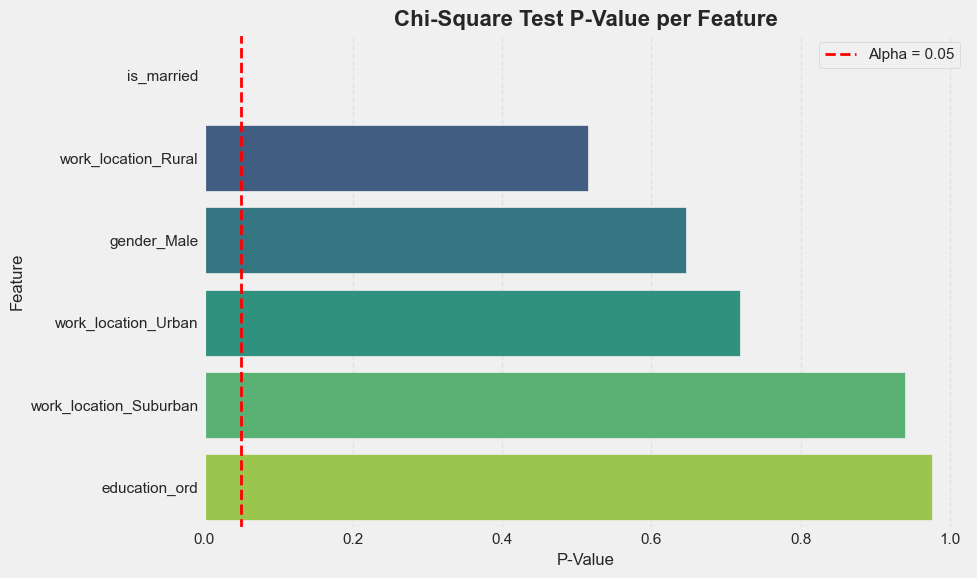

In [45]:
# ====== 1) GRAFIK P-VALUE + GARIS BATAS SIGNIFIKAN ======
alpha = 0.05  # threshold signifikan

plt.figure(figsize=(10, 6))
sns.barplot(
    data=chi_df_engineered.sort_values("P_Value"),
    x="P_Value",
    y="Feature",
    palette="viridis"
)

# garis batas signifikan
plt.axvline(alpha, color='red', linestyle='--', linewidth=2, label='Alpha = 0.05')

plt.title("Chi-Square Test P-Value per Feature", fontsize=16, fontweight='bold')
plt.xlabel("P-Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


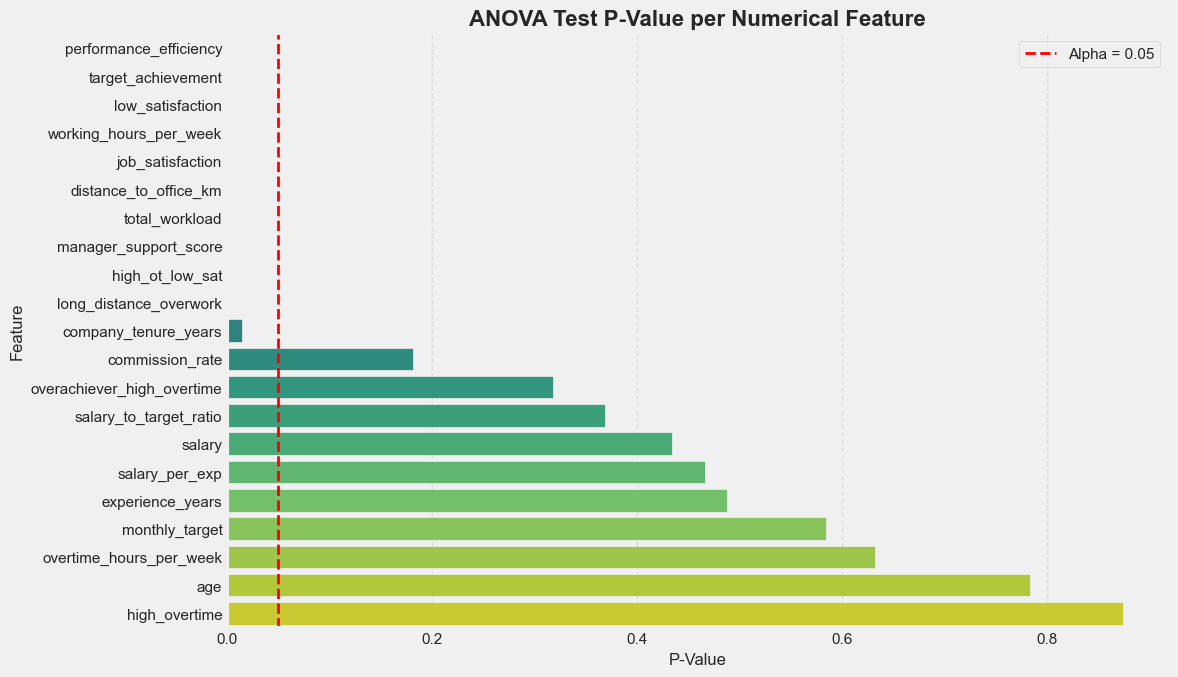

In [46]:
from scipy.stats import f_oneway

# Identify numerical columns (exclude churn)
anova_results = []

# ANOVA for each numerical feature
for col in numerical_cols:
    # Correctly filter X_train based on y_train values
    group0 = X_train.loc[y_train[y_train == 0].index, col].dropna()
    group1 = X_train.loc[y_train[y_train == 1].index, col].dropna()

    if len(group0) > 1 and len(group1) > 1:
        stat, p = f_oneway(group0, group1)
        anova_results.append([col, p])

# Convert to DataFrame
anova_df = pd.DataFrame(anova_results, columns=['Feature', 'P_Value'])
anova_df = anova_df.sort_values("P_Value")

# Plot p-values with alpha threshold
alpha = 0.05
plt.figure(figsize=(12, 7))
sns.barplot(
    data=anova_df,
    x="P_Value",
    y="Feature",
    palette="viridis"
)

plt.axvline(alpha, color='red', linestyle='--', linewidth=2, label='Alpha = 0.05')

plt.title("ANOVA Test P-Value per Numerical Feature", fontsize=16, fontweight='bold')
plt.xlabel("P-Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [47]:
selected_features=[
 'performance_efficiency',
 'low_satisfaction',
 'target_achievement',
 'high_ot_low_sat',
 'working_hours_per_week',
 'distance_to_office_km',
 'total_workload',
 'job_satisfaction',
 'long_distance_overwork',
 'company_tenure_years',
 'manager_support_score',
 'is_married'
]
target_col='churn'

In [48]:
X = df[selected_features].copy()
y = df[target_col].copy()

print("Shape fitur :", X.shape)
print("Distribusi target:\n", y.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("\nTrain size :", X_train.shape, "\n", y_train.value_counts())
print("\nTest size  :", X_test.shape, "\n", y_test.value_counts())

Shape fitur : (926, 12)
Distribusi target:
 churn
1    0.631749
0    0.368251
Name: proportion, dtype: float64

Train size : (648, 12) 
 churn
1    409
0    239
Name: count, dtype: int64

Test size  : (278, 12) 
 churn
1    176
0    102
Name: count, dtype: int64


### Handling Class Imbalance

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [50]:
X_train.shape

(818, 12)

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   performance_efficiency  926 non-null    float64
 1   low_satisfaction        926 non-null    int64  
 2   target_achievement      926 non-null    float64
 3   high_ot_low_sat         926 non-null    int64  
 4   working_hours_per_week  926 non-null    int64  
 5   distance_to_office_km   926 non-null    int64  
 6   total_workload          926 non-null    int64  
 7   job_satisfaction        926 non-null    int64  
 8   long_distance_overwork  926 non-null    float64
 9   company_tenure_years    926 non-null    float64
 10  manager_support_score   926 non-null    int64  
 11  is_married              926 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 126.3 KB


In [52]:
# !pip install catboost

In [53]:
import sys
print(sys.executable)

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

print("CatBoost & XGBoost OK")


c:\Data Ridho\Belajar python\my_env\Scripts\python.exe
CatBoost & XGBoost OK


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier # Corrected import
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F2: recall lebih berat
f2_scorer = make_scorer(
    fbeta_score,
    beta=2,
    pos_label=1
)

*TUning*

In [56]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.metrics import make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline



In [57]:
X = df[selected_features].copy()
y = df[target_col].copy()

print("Shape fitur :", X.shape)
print("Distribusi target:\n", y.value_counts(normalize=True))

# Split train-test 70:30 dengan stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("\nTrain size :", X_train.shape, "\n", y_train.value_counts())
print("\nTest size  :", X_test.shape, "\n", y_test.value_counts())



Shape fitur : (926, 12)
Distribusi target:
 churn
1    0.631749
0    0.368251
Name: proportion, dtype: float64

Train size : (648, 12) 
 churn
1    409
0    239
Name: count, dtype: int64

Test size  : (278, 12) 
 churn
1    176
0    102
Name: count, dtype: int64


# Modeling

In [58]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# F2: recall lebih berat
f2_scorer = make_scorer(
    fbeta_score,
    beta=2,
    pos_label=1
)

In [59]:
from imblearn.pipeline import Pipeline as ImbPipeline
# ---------- MODEL YANG PERLU SMOTE + SCALING ----------
log_reg_default = LogisticRegression(max_iter=2000, random_state=42)
svm_clf_default = SVC(probability=True, random_state=42)
knn_clf_default = KNeighborsClassifier()

pipe_logreg_default = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.6)),
    ("scaler", StandardScaler()),
    ("model", log_reg_default)
])

pipe_svm_default = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.6)),
    ("scaler", StandardScaler()),
    ("model", svm_clf_default)
])

pipe_knn_default = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.6)),
    ("scaler", StandardScaler()),
    ("model", knn_clf_default)
])

# ---------- MODEL TREE-BASED (TANPA SCALING, TANPA SMOTE) ----------
rf_default = RandomForestClassifier(random_state=42)
gb_default = GradientBoostingClassifier(random_state=42)
ada_default = AdaBoostClassifier(random_state=42)

# ---------- BOOSTING MODELS DENGAN CLASS WEIGHTS ----------
# Hitung rasio imbalance
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
ratio = neg / pos

xgb_default = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    n_jobs=-1,
    scale_pos_weight=ratio
)

cat_default = CatBoostClassifier(
    random_seed=42,
    verbose=False,
    auto_class_weights='Balanced'
)

all_models_default = {
    # Dengan SMOTE + Scaling
    "Logistic Regression": pipe_logreg_default,
    "SVM": pipe_svm_default,
    "KNN": pipe_knn_default,

    # Tree-based (tanpa preprocessing)
    "Random Forest": rf_default,
    "Gradient Boosting": gb_default,
    "AdaBoost": ada_default,

    # Boosting dengan class weights
    "XGBoost": xgb_default,
    "CatBoost": cat_default,
}


In [60]:
# Dictionary untuk menyimpan hasil
results_default = {}

print("=== TRAINING & EVALUASI DEFAULT MODELS ===")
print("=" * 70)

for name, model in all_models_default.items():
    print(f"\n Training: {name}")
    # TRAINING model
    model.fit(X_train, y_train)

    # PREDICTION untuk TRAIN dan TEST
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # EVALUATION untuk TRAIN
    f2_train = fbeta_score(y_train, y_pred_train, beta=2)
    recall_train = recall_score(y_train, y_pred_train)

    # EVALUATION untuk TEST
    f2_test = fbeta_score(y_test, y_pred_test, beta=2)
    recall_test = recall_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Simpan hasil
    results_default[name] = {
        'model': model,
        'train': {
            'f2_score': f2_train,
            'recall': recall_train
        },
        'test': {
            'f2_score': f2_test,
            'recall': recall_test,
            'precision': precision_test,
            'accuracy': accuracy_test
        }
    }

    print(f"TRAIN  - F2: {f2_train:.4f} | Recall: {recall_train:.4f}")
    print(f"TEST   - F2: {f2_test:.4f} | Recall: {recall_test:.4f}")

=== TRAINING & EVALUASI DEFAULT MODELS ===

 Training: Logistic Regression
TRAIN  - F2: 0.8129 | Recall: 0.8289
TEST   - F2: 0.8137 | Recall: 0.8239

 Training: SVM
TRAIN  - F2: 0.8764 | Recall: 0.8949
TEST   - F2: 0.8259 | Recall: 0.8409

 Training: KNN
TRAIN  - F2: 0.8642 | Recall: 0.8680
TEST   - F2: 0.7609 | Recall: 0.7557

 Training: Random Forest
TRAIN  - F2: 1.0000 | Recall: 1.0000
TEST   - F2: 0.8249 | Recall: 0.8352

 Training: Gradient Boosting
TRAIN  - F2: 0.9481 | Recall: 0.9560
TEST   - F2: 0.7955 | Recall: 0.7955

 Training: AdaBoost
TRAIN  - F2: 0.8414 | Recall: 0.8484
TEST   - F2: 0.7886 | Recall: 0.7841

 Training: XGBoost
TRAIN  - F2: 1.0000 | Recall: 1.0000
TEST   - F2: 0.7802 | Recall: 0.7784

 Training: CatBoost
TRAIN  - F2: 0.9580 | Recall: 0.9487
TEST   - F2: 0.8142 | Recall: 0.8068


## Tuning

In [61]:
# Logistic Regression (nanti dipakai di pipeline SMOTE+Scaling)
param_grid_logreg = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__class_weight": [None, "balanced"]
}

# SVM (SMOTE + Scaling)
param_grid_svm = {
    "model__C": [0.1, 1, 10, 50],
    "model__gamma": ["scale", "auto"],
    "model__kernel": ["rbf"]
}

# KNN (SMOTE + Scaling)
param_grid_knn = {
    "model__n_neighbors": [3, 5, 7, 9, 11],
    "model__weights": ["uniform", "distance"],
    "model__metric": ["euclidean", "manhattan"]
}

# Random Forest (SMOTE, no scaling)
param_grid_rf = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__bootstrap": [True, False]
}

# Gradient Boosting (SMOTE, no scaling)
param_grid_gb = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [2, 3],
    "model__subsample": [0.7, 0.9, 1.0]
}

# AdaBoost (SMOTE, no scaling)
param_grid_ada = {
    "model__n_estimators": [50, 100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.3]
}

# XGBoost (NO SMOTE, NO scaling) → pakai scale_pos_weight
# scale_pos_weight ditambahkan setelah kita hitung rasio imbalance
param_grid_xgb = {
    "n_estimators": [100, 200, 400],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 1.0],
    # scale_pos_weight akan kita isi berdasarkan rasio
}

# CatBoost (NO SMOTE, NO scaling) → pakai class_weights
param_grid_cat = {
    "iterations": [200, 400, 600],
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [4, 6, 8],
    "l2_leaf_reg": [1, 3, 5]
}



## Pipeline

In [62]:
# ---------- MODEL DENGAN SMOTE + SCALING ----------
log_reg = LogisticRegression(max_iter=2000, solver='liblinear')
svm_clf = SVC(probability=True, random_state=42)
knn_clf = KNeighborsClassifier()

pipe_logreg = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.6)),
    ("scaler", StandardScaler()),
    ("model", log_reg)
])

pipe_svm = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.6)),
    ("scaler", StandardScaler()),
    ("model", svm_clf)
])

pipe_knn = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.6)),
    ("scaler", StandardScaler()),
    ("model", knn_clf)
])

models_smote_scaled = {
    "LogReg (SMOTE+Scaled)": (pipe_logreg, param_grid_logreg),
    "SVM (SMOTE+Scaled)": (pipe_svm, param_grid_svm),
    "KNN (SMOTE+Scaled)": (pipe_knn, param_grid_knn),
}

# ---------- MODEL TREE DENGAN SMOTE (TANPA SCALING) ----------
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)

pipe_rf = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.6)),
    ("model", rf_clf)
])

pipe_gb = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.6)),
    ("model", gb_clf)
])

pipe_ada = ImbPipeline(steps=[
    ("smote", SMOTE(random_state=42, sampling_strategy=0.6)),
    ("model", ada_clf)
])

models_tree_smote = {
    "Random Forest (SMOTE)": (pipe_rf, param_grid_rf),
    "Gradient Boosting (SMOTE)": (pipe_gb, param_grid_gb),
    "AdaBoost (SMOTE)": (pipe_ada, param_grid_ada)
}

# ---------- XGBOOST & CATBOOST (NO SMOTE, NO SCALING) ----------
# Hitung rasio imbalance untuk weight
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
ratio = neg / pos
print("\nNeg:", neg, "Pos:", pos, "scale_pos_weight ratio:", ratio)

# XGBoost
xgb_base = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    n_jobs=-1
)

# tambahkan scale_pos_weight ke param_grid
param_grid_xgb["scale_pos_weight"] = [1.0, ratio * 0.5, ratio, ratio * 1.5]

# CatBoost (pakai class_weights)
cat_base = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="F1",
    random_seed=42,
    verbose=False
)

# models khusus ini tanpa SMOTE
models_weighted = {
    "XGBoost (scale_pos_weight)": (xgb_base, param_grid_xgb),
    "CatBoost (class_weights)": (cat_base, param_grid_cat),
}




Neg: 239 Pos: 409 scale_pos_weight ratio: 0.5843520782396088


## Fit Model

In [63]:
# Fungsi custom yang biasanya dipakai di tutorial / notebook orang
def run_grid_search(name, pipeline, param_grid, X_train, y_train):
    print(f"\n=== Mulai GridSearch untuk {name} ===")

    gs = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='recall',
        n_jobs=1,
        verbose=1
    )

    gs.fit(X_train, y_train)

    print(f"Best params {name}: {gs.best_params_}")
    print(f"Best CV score {name}: {gs.best_score_:.4f}")

    return gs

In [64]:

def evaluate_on_train_test_simple(model_name, best_estimator, X_train, y_train, X_test, y_test):
    """Hitung F2, Precision, Recall dan Confusion Matrix untuk train dan test set."""

    # PREDICTION untuk TRAIN dan TEST
    y_pred_train = best_estimator.predict(X_train)
    y_pred_test = best_estimator.predict(X_test)

    # EVALUATION untuk TRAIN
    prec_train = precision_score(y_train, y_pred_train, pos_label=1)
    rec_train  = recall_score(y_train, y_pred_train, pos_label=1)
    f2_train   = fbeta_score(y_train, y_pred_train, beta=2, pos_label=1)
    cm_train = confusion_matrix(y_train, y_pred_train)

    # EVALUATION untuk TEST
    prec_test = precision_score(y_test, y_pred_test, pos_label=1)
    rec_test  = recall_score(y_test, y_pred_test, pos_label=1)
    f2_test   = fbeta_score(y_test, y_pred_test, beta=2, pos_label=1)
    cm_test = confusion_matrix(y_test, y_pred_test)

    print(f"\n=== Train & Test Metrics: {model_name} ===")
    print(" TRAIN SET:")
    print(f"   Precision  : {prec_train:.4f}")
    print(f"   Recall     : {rec_train:.4f}")
    print(f"   F2-Score   : {f2_train:.4f}")
    print("   Confusion Matrix:")
    print(f"   {cm_train}")

    print(" TEST SET:")
    print(f"   Precision  : {prec_test:.4f}")
    print(f"   Recall     : {rec_test:.4f}")
    print(f"   F2-Score   : {f2_test:.4f}")
    print("   Confusion Matrix:")
    print(f"   {cm_test}")

    return {
        "Model": model_name,
        # TRAIN Metrics
        "Train_Precision": prec_train,
        "Train_Recall": rec_train,
        "Train_F2": f2_train,
        "Train_CM": cm_train,
        # TEST Metrics
        "Test_Precision": prec_test,
        "Test_Recall": rec_test,
        "Test_F2": f2_test,
        "Test_CM": cm_test
    }

In [65]:
results_rows = []
model_pipelines = {}

# Model SMOTE + Scaled
print("MEMULAI GRID SEARCH: MODEL SMOTE + SCALED")
print("=" * 50)
for name, (pipe, pgrid) in models_smote_scaled.items():
    gs = run_grid_search(name, pipe, pgrid, X_train, y_train)
    best_est = gs.best_estimator_
    model_pipelines[name] = best_est   # <--- SIMPAN MODEL
    row = evaluate_on_train_test_simple(name, best_est, X_train, y_train, X_test, y_test)
    results_rows.append(row)

# Model Tree + SMOTE (tanpa scaling)
print("\n MEMULAI GRID SEARCH: MODEL TREE + SMOTE")
print("=" * 50)
for name, (pipe, pgrid) in models_tree_smote.items():
    gs = run_grid_search(name, pipe, pgrid, X_train, y_train)
    best_est = gs.best_estimator_
    model_pipelines[name] = best_est   # <--- SIMPAN MODEL
    row = evaluate_on_train_test_simple(name, best_est, X_train, y_train, X_test, y_test)
    results_rows.append(row)

# Model Weighted (XGBoost + CatBoost)
print("\n MEMULAI GRID SEARCH: MODEL WEIGHTED")
print("=" * 50)
for name, (model_base, pgrid) in models_weighted.items():
    gs = run_grid_search(name, model_base, pgrid, X_train, y_train)
    best_est = gs.best_estimator_
    model_pipelines[name] = best_est   # <--- SIMPAN MODEL
    row = evaluate_on_train_test_simple(name, best_est, X_train, y_train, X_test, y_test)
    results_rows.append(row)


MEMULAI GRID SEARCH: MODEL SMOTE + SCALED

=== Mulai GridSearch untuk LogReg (SMOTE+Scaled) ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best params LogReg (SMOTE+Scaled): {'model__C': 1, 'model__class_weight': None}
Best CV score LogReg (SMOTE+Scaled): 0.8190

=== Train & Test Metrics: LogReg (SMOTE+Scaled) ===
 TRAIN SET:
   Precision  : 0.7567
   Recall     : 0.8289
   F2-Score   : 0.8133
   Confusion Matrix:
   [[130 109]
 [ 70 339]]
 TEST SET:
   Precision  : 0.7754
   Recall     : 0.8239
   F2-Score   : 0.8137
   Confusion Matrix:
   [[ 60  42]
 [ 31 145]]

=== Mulai GridSearch untuk SVM (SMOTE+Scaled) ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params SVM (SMOTE+Scaled): {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best CV score SVM (SMOTE+Scaled): 0.9487

=== Train & Test Metrics: SVM (SMOTE+Scaled) ===
 TRAIN SET:
   Precision  : 0.7201
   Recall     : 0.9438
   F2-Score   : 0.8886
   Confusion Matrix:
   [[ 89 150]
 [ 23 386]]
 TEST SET:
   Precision  : 0.7022
   Recall     : 0.8977
   F2-Score   : 0.8504
   Confusion Matrix:
   [[ 35  67]
 [ 18 158]]

=== Mulai G

## Pemilihan model

In [66]:
results_df = pd.DataFrame(results_rows)
results_df = results_df.sort_values("Test_F2", ascending=False)

best_model_row  = results_df.iloc[0]
best_model_name = best_model_row["Model"]
best_model_est  = model_pipelines[best_model_name]


In [67]:
results_df

,Model,Train_Precision,Train_Recall,Train_F2,Train_CM,Test_Precision,Test_Recall,Test_F2,Test_CM
4,Gradient Boosting (SMOTE),0.722015,0.946210,0.890884,"[[90, 149], [22, 387]]",0.704348,0.920455,0.867238,"[[34, 68], [14, 162]]"
6,XGBoost (scale_pos_weight),0.754902,0.941320,0.897018,"[[114, 125], [24, 385]]",0.726027,0.903409,0.861322,"[[42, 60], [17, 159]]"
1,SVM (SMOTE+Scaled),0.720149,0.943765,0.888582,"[[89, 150], [23, 386]]",0.702222,0.897727,0.850377,"[[35, 67], [18, 158]]"
7,CatBoost (class_weights),0.810044,0.907090,0.885864,"[[152, 87], [38, 371]]",0.775510,0.863636,0.844444,"[[58, 44], [24, 152]]"
3,Random Forest (SMOTE),0.837838,0.909535,0.894231,"[[167, 72], [37, 372]]",0.776042,0.846591,0.831473,"[[59, 43], [27, 149]]"
5,AdaBoost (SMOTE),0.790850,0.887531,0.866348,"[[143, 96], [46, 363]]",0.781915,0.835227,0.823991,"[[61, 41], [29, 147]]"
2,KNN (SMOTE+Scaled),0.815789,0.833741,0.830088,"[[162, 77], [68, 341]]",0.796703,0.823864,0.818284,"[[65, 37], [31, 145]]"
0,LogReg (SMOTE+Scaled),0.756696,0.828851,0.813340,"[[130, 109], [70, 339]]",0.775401,0.823864,0.813692,"[[60, 42], [31, 145]]"


In [68]:
if hasattr(best_model_est, "named_steps"):
    model_core = best_model_est.named_steps["model"]
else:
    model_core = best_model_est


In [69]:
# Buat DataFrame dari hasil
results_df = pd.DataFrame(results_rows)

# Urutkan berdasarkan F2-Score tertinggi
results_df = results_df.sort_values("Test_F2", ascending=False)

print("\n" + "=" * 60)
print(" HASIL AKHIR SEMUA MODEL (Diurutkan oleh Test F2-Score)")
print("=" * 60)

# Tampilkan hanya metrics yang penting
# No need for summary_cols if not directly used for display logic
for _, row in results_df.iterrows():
    print(f"{row['Model']:30} F2: {row['Test_F2']:.4f} | Recall: {row['Test_Recall']:.4f} | Precision: {row['Test_Precision']:.4f}")

# Tampilkan model terbaik
best_model = results_df.iloc[0]
print(f"\n MODEL TERBAIK: {best_model['Model']}")
print(f"   F2-Score : {best_model['Test_F2']:.4f}")
print(f"   Recall   : {best_model['Test_Recall']:.4f}")
print(f"   Precision: {best_model['Test_Precision']:.4f}")


 HASIL AKHIR SEMUA MODEL (Diurutkan oleh Test F2-Score)
Gradient Boosting (SMOTE)      F2: 0.8672 | Recall: 0.9205 | Precision: 0.7043
XGBoost (scale_pos_weight)     F2: 0.8613 | Recall: 0.9034 | Precision: 0.7260
SVM (SMOTE+Scaled)             F2: 0.8504 | Recall: 0.8977 | Precision: 0.7022
CatBoost (class_weights)       F2: 0.8444 | Recall: 0.8636 | Precision: 0.7755
Random Forest (SMOTE)          F2: 0.8315 | Recall: 0.8466 | Precision: 0.7760
AdaBoost (SMOTE)               F2: 0.8240 | Recall: 0.8352 | Precision: 0.7819
KNN (SMOTE+Scaled)             F2: 0.8183 | Recall: 0.8239 | Precision: 0.7967
LogReg (SMOTE+Scaled)          F2: 0.8137 | Recall: 0.8239 | Precision: 0.7754

 MODEL TERBAIK: Gradient Boosting (SMOTE)
   F2-Score : 0.8672
   Recall   : 0.9205
   Precision: 0.7043


## Confusion Matrix

In [70]:
print("=== Confusion Matrices for Test Set ===")
for _, row in results_df.iterrows():
    model_name = row['Model']
    test_cm = row['Test_CM']
    print(f"\n--- {model_name} ---")
    print(test_cm)

=== Confusion Matrices for Test Set ===

--- Gradient Boosting (SMOTE) ---
[[ 34  68]
 [ 14 162]]

--- XGBoost (scale_pos_weight) ---
[[ 42  60]
 [ 17 159]]

--- SVM (SMOTE+Scaled) ---
[[ 35  67]
 [ 18 158]]

--- CatBoost (class_weights) ---
[[ 58  44]
 [ 24 152]]

--- Random Forest (SMOTE) ---
[[ 59  43]
 [ 27 149]]

--- AdaBoost (SMOTE) ---
[[ 61  41]
 [ 29 147]]

--- KNN (SMOTE+Scaled) ---
[[ 65  37]
 [ 31 145]]

--- LogReg (SMOTE+Scaled) ---
[[ 60  42]
 [ 31 145]]


=== Confusion Matrices for Test Set ===


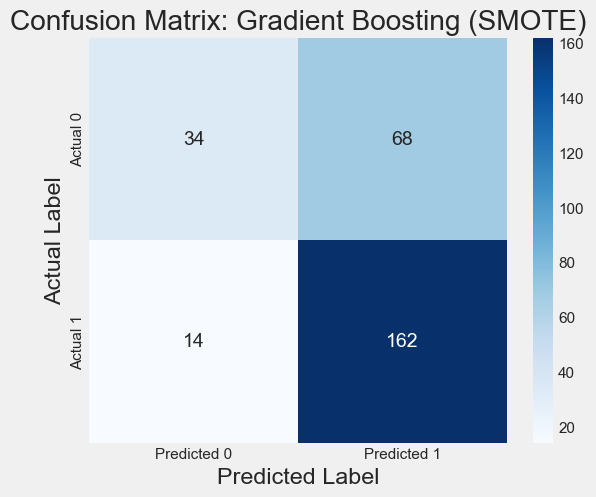

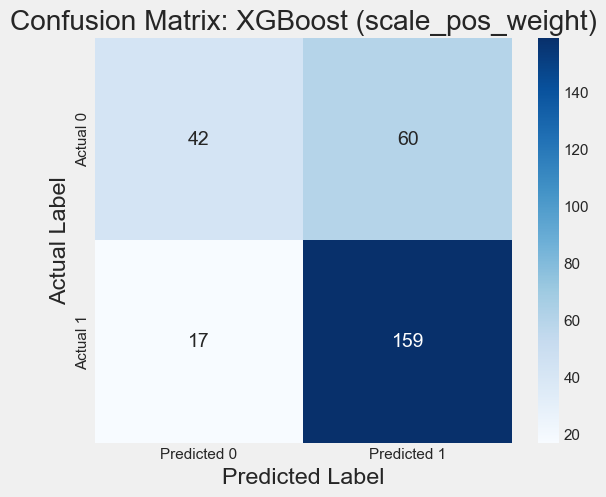

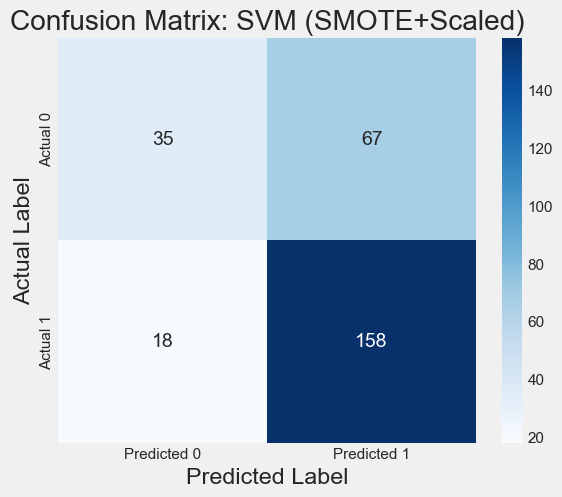

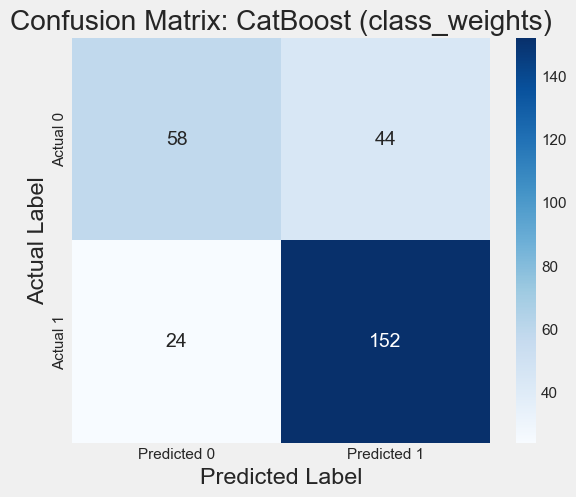

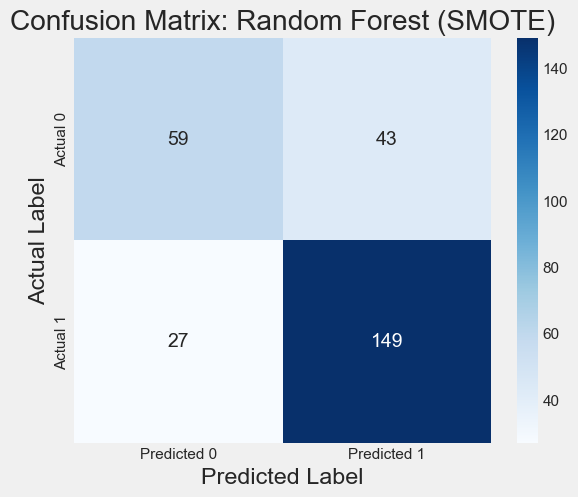

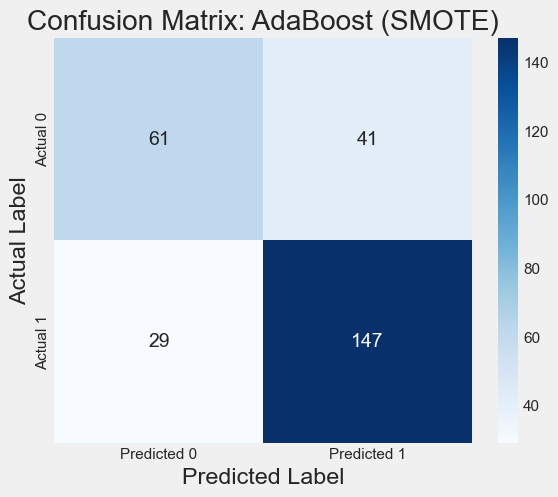

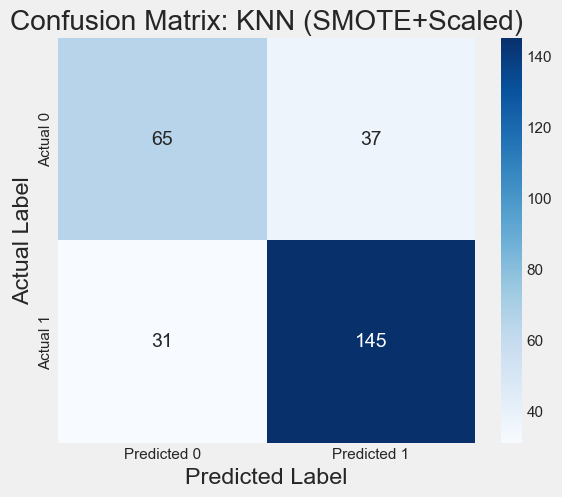

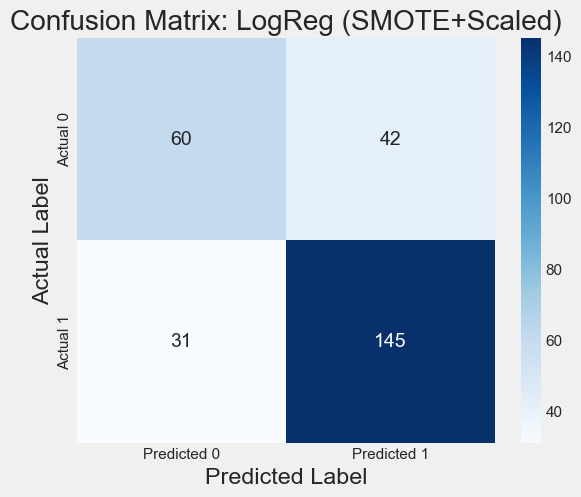

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Confusion Matrices for Test Set ===")
for _, row in results_df.iterrows():
    model_name = row['Model']
    test_cm = row['Test_CM']

    plt.figure(figsize=(6, 5))
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [72]:
model_pipelines

{'LogReg (SMOTE+Scaled)': Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.6)),
                 ('scaler', StandardScaler()),
                 ('model',
                  LogisticRegression(C=1, max_iter=2000, solver='liblinear'))]),
 'SVM (SMOTE+Scaled)': Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.6)),
                 ('scaler', StandardScaler()),
                 ('model', SVC(C=0.1, probability=True, random_state=42))]),
 'KNN (SMOTE+Scaled)': Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.6)),
                 ('scaler', StandardScaler()),
                 ('model',
                  KNeighborsClassifier(metric='euclidean', n_neighbors=11))]),
 'Random Forest (SMOTE)': Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.6)),
                 ('model',
                  RandomForestClassifier(max_depth=5, min_samples_split=10,
                                         n_estimators=200, random_state

# SHAP

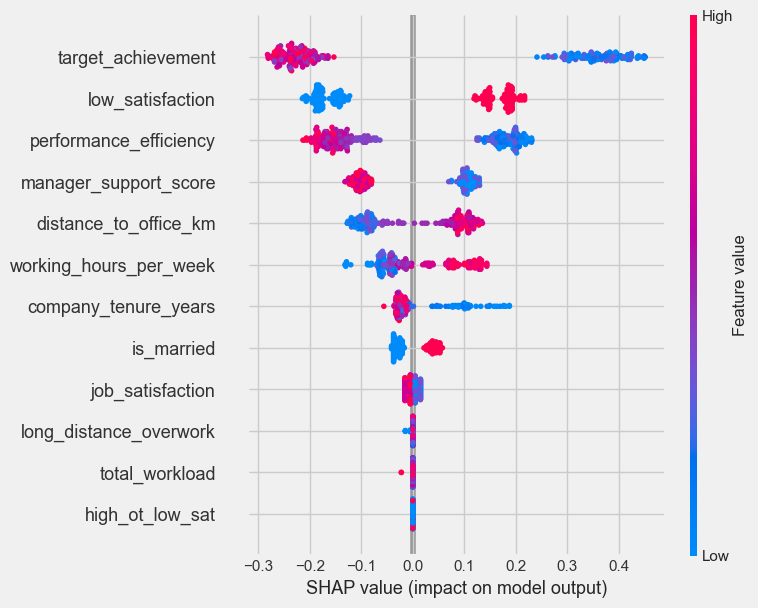

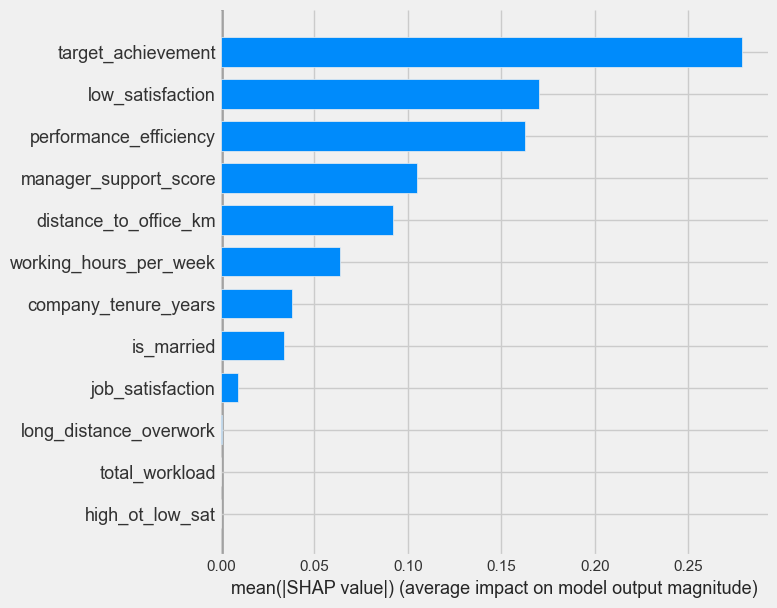

In [73]:
# Tree based model
import shap

# estimator adalah pipeline, ambil step 'model'
if hasattr(best_model_est, "named_steps"):
    model_core = best_model_est.named_steps["model"]
else:
    model_core = best_model_est

X_shap = X_test.copy()

explainer = shap.TreeExplainer(model_core)
shap_values = explainer.shap_values(X_shap)

if isinstance(shap_values, list):
    shap_values_plot = shap_values[1]
else:
    shap_values_plot = shap_values

# Summary plot (dot)
shap.summary_plot(shap_values_plot, X_shap, plot_type="dot")

# Summary plot (bar)
shap.summary_plot(shap_values_plot, X_shap, plot_type="bar")

Ditemukan 14 False Negatives. Menampilkan 3 contoh teratas...

--- Kasus FN #1: Employee ID = 116 ---


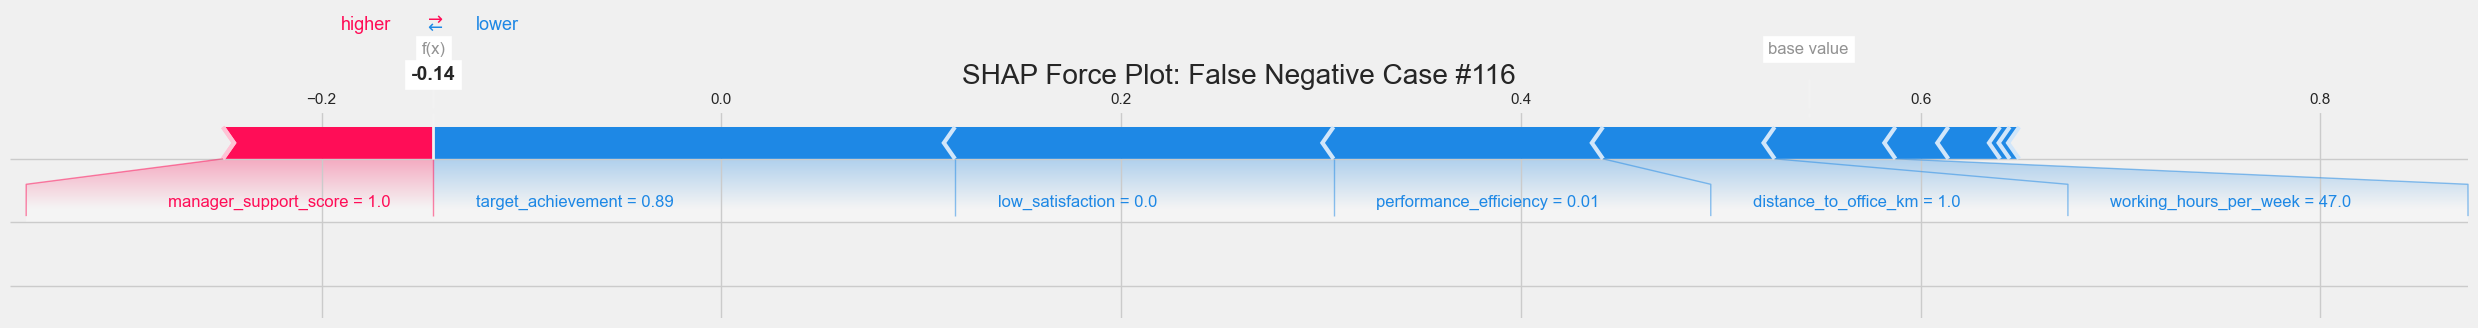


--- Kasus FN #2: Employee ID = 726 ---


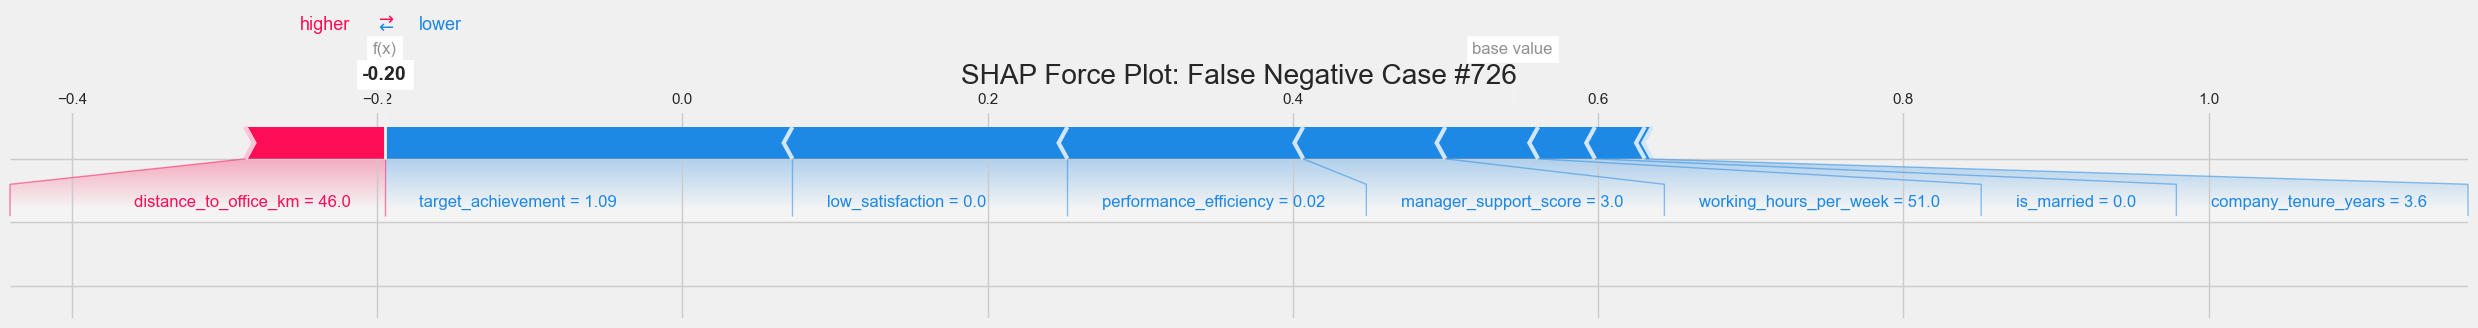


--- Kasus FN #3: Employee ID = 163 ---


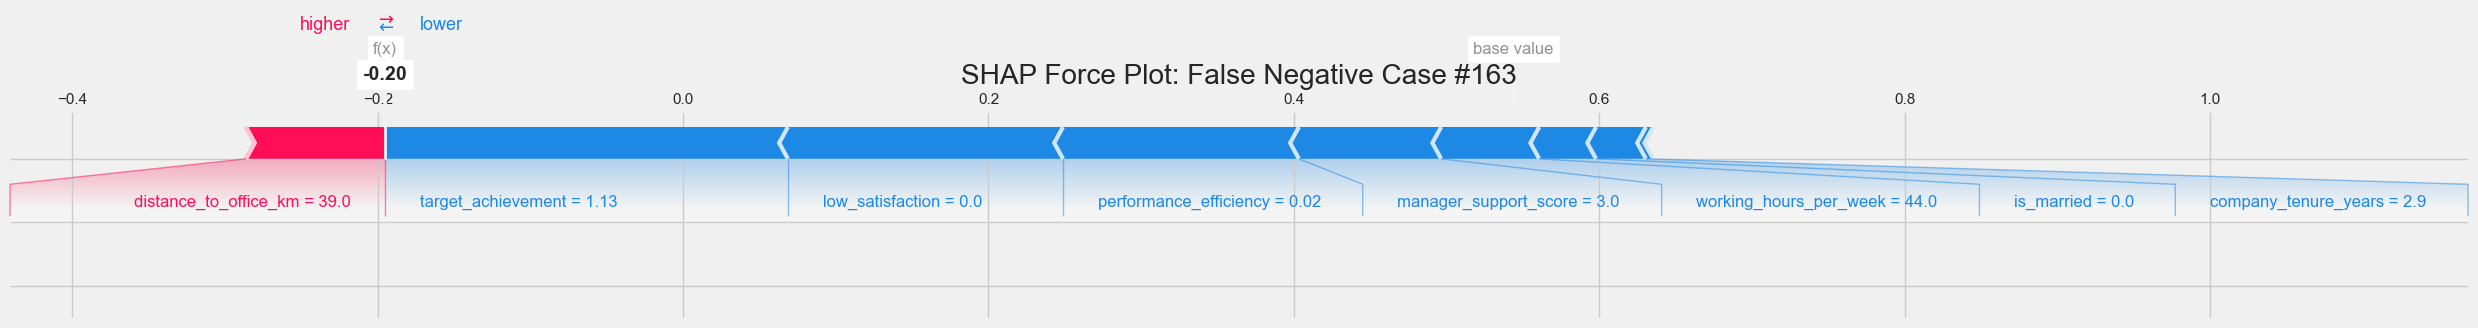

In [74]:
# False Negative

import shap
import matplotlib.pyplot as plt

# Calculate y_pred using the best model on X_test_correct
# best_model_est is the pipeline/model from GridSearchCV results
y_pred = best_model_est.predict(X_test)

# 1. Identifikasi False Negatives: actual churn = 1, prediksi = 0
fn_mask = (y_test == 1) & (y_pred == 0)
X_fn = X_test[fn_mask]

if X_fn.shape[0] == 0:
    print("Tidak ada False Negatives untuk dianalisis.")
else:
    print(f"Ditemukan {X_fn.shape[0]} False Negatives. Menampilkan 3 contoh teratas...")

    # 2. Ekstrak model inti (pastikan ini GradientBoostingClassifier)
    best_model_core = model_core

    # 3. Buat explainer
    explainer = shap.TreeExplainer(best_model_core)

    # 4. Ambil 3 contoh FN pertama untuk force plot
    sample_indices = X_fn.index[:3]  # ambil index asli

    for i, idx in enumerate(sample_indices):
        print(f"\n--- Kasus FN #{i+1}: Employee ID = {df.loc[idx, 'employee_id'] if 'employee_id' in df.columns else idx} ---")

        # Ambil data satu sampel
        x_sample = X_test.loc[[idx]]

        # Hitung SHAP values untuk sampel ini
        shap_values_sample = explainer.shap_values(x_sample)

        # Karena GradientBoosting: shap_values_sample = array (1, n_features)
        # Force plot butuh shape (n_features,)
        shap_values_1d = shap_values_sample[0] if shap_values_sample.ndim == 2 else shap_values_sample

        # Plot
        shap.force_plot(
            explainer.expected_value,
            shap_values_1d,
            x_sample.values[0].round(2),
            feature_names=X_test.columns,
            matplotlib=True,
            show=False
        )
        fig = plt.gcf()
        fig.set_size_inches(25, 4) # Set the figure size
        plt.title(f"SHAP Force Plot: False Negative Case #{df.loc[idx, 'employee_id'] if 'employee_id' in df.columns else idx}")
        plt.tight_layout()
        plt.show()

Ditemukan 68 False False Positive. Menampilkan 3 contoh teratas...

--- Kasus FN #1: Employee ID = 586 ---


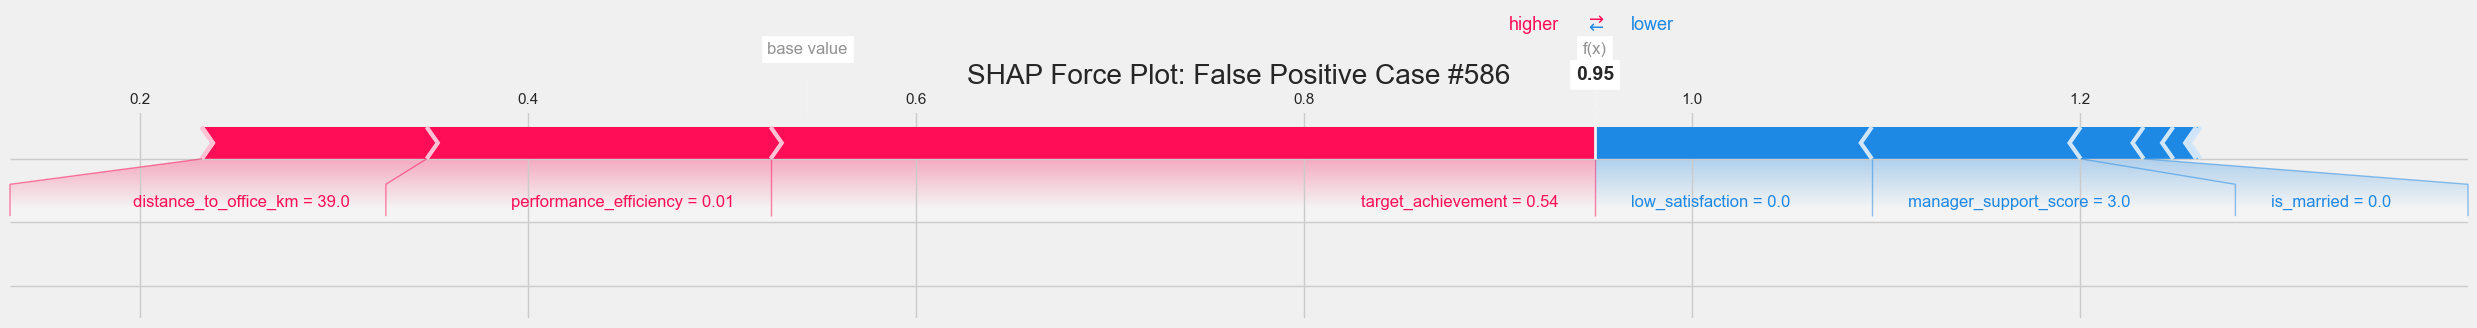


--- Kasus FN #2: Employee ID = 137 ---


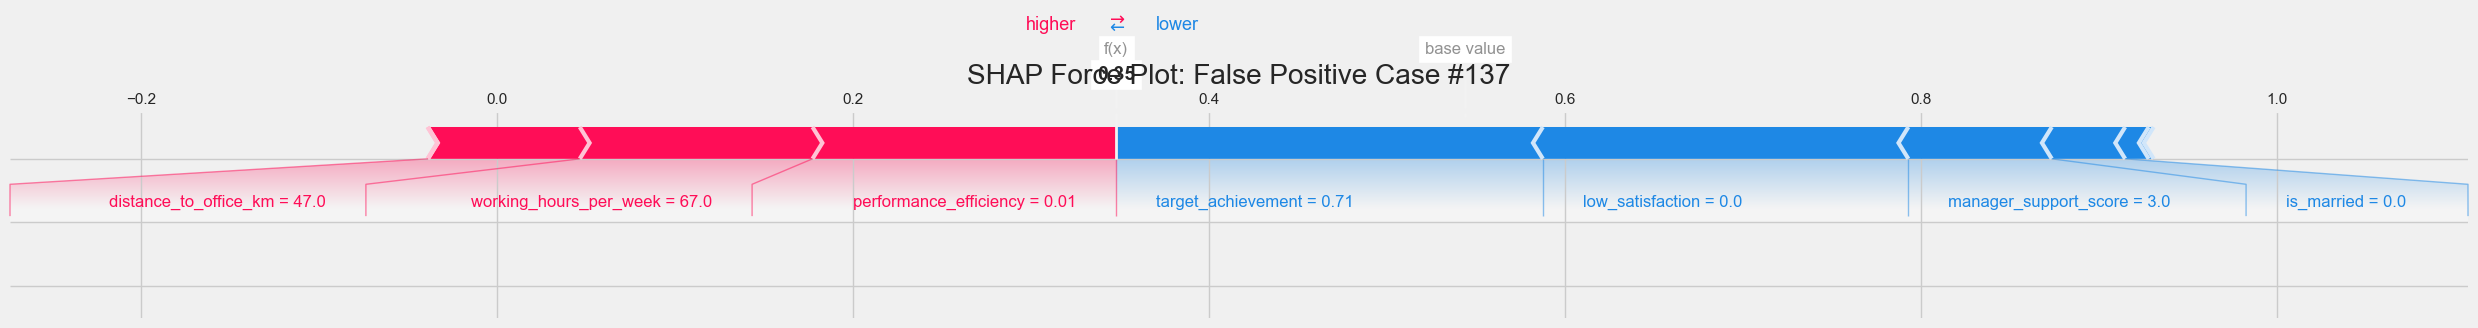


--- Kasus FN #3: Employee ID = 174 ---


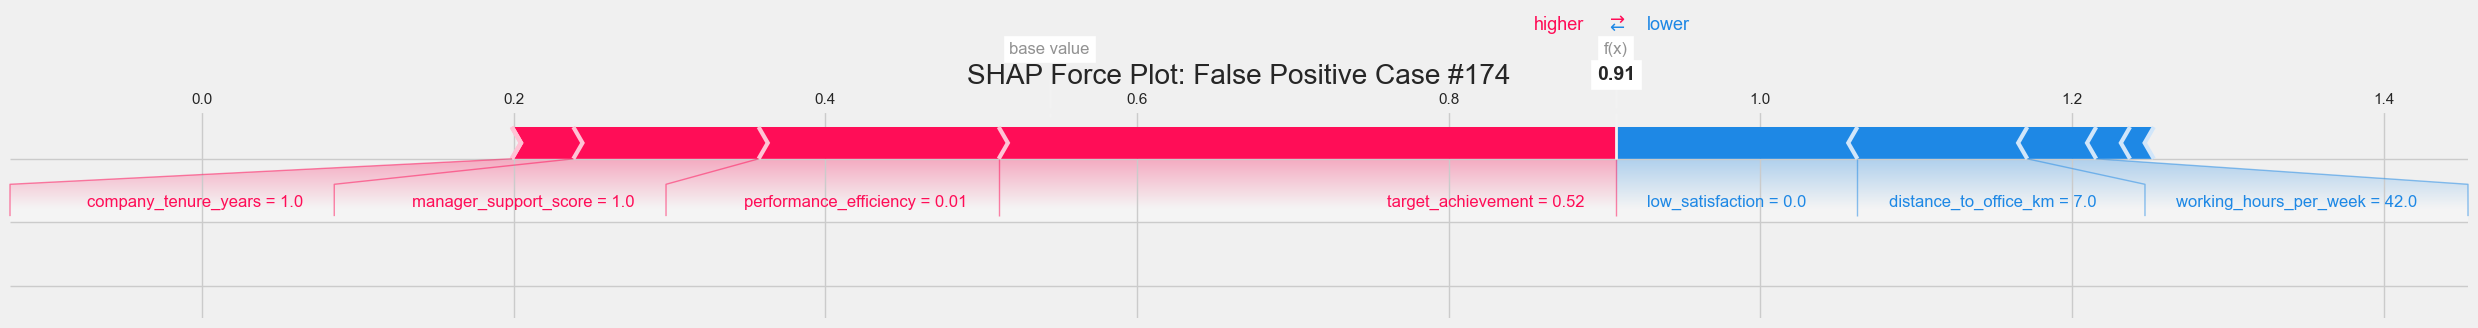

In [75]:
# False Positive

import shap
import matplotlib.pyplot as plt

# Calculate y_pred using the best model on X_test_correct
# best_model_est is the pipeline/model from GridSearchCV results
y_pred = best_model_est.predict(X_test)

# 1. Identifikasi False Negatives: actual churn = 1, prediksi = 0
fn_mask = (y_test == 0) & (y_pred == 1)
X_fn = X_test[fn_mask]

if X_fn.shape[0] == 0:
    print("Tidak ada False Positive untuk dianalisis.")
else:
    print(f"Ditemukan {X_fn.shape[0]} False False Positive. Menampilkan 3 contoh teratas...")

    # 2. Ekstrak model inti (pastikan ini GradientBoostingClassifier)
    best_model_core = model_core

    # 3. Buat explainer
    explainer = shap.TreeExplainer(best_model_core)

    # 4. Ambil 3 contoh FN pertama untuk force plot
    sample_indices = X_fn.index[:3]  # ambil index asli

    for i, idx in enumerate(sample_indices):
        print(f"\n--- Kasus FN #{i+1}: Employee ID = {df.loc[idx, 'employee_id'] if 'employee_id' in df.columns else idx} ---")

        # Ambil data satu sampel
        x_sample = X_test.loc[[idx]]

        # Hitung SHAP values untuk sampel ini
        shap_values_sample = explainer.shap_values(x_sample)

        # Karena GradientBoosting: shap_values_sample = array (1, n_features)
        # Force plot butuh shape (n_features,)
        shap_values_1d = shap_values_sample[0] if shap_values_sample.ndim == 2 else shap_values_sample

        # Plot
        shap.force_plot(
            explainer.expected_value,
            shap_values_1d,
            x_sample.values[0].round(2),
            feature_names=X_test.columns,
            matplotlib=True,
            show=False
        )
        fig = plt.gcf()
        fig.set_size_inches(25, 4) # Set the figure size
        plt.title(f"SHAP Force Plot: False Positive Case #{df.loc[idx, 'employee_id'] if 'employee_id' in df.columns else idx}")
        plt.tight_layout()
        plt.show()

fitur penting global juga muncul lokal, seperti distance_to_office_km & manager_support_score

> Lime plot (opsional)

Index: 116 | Label aktual: Churn


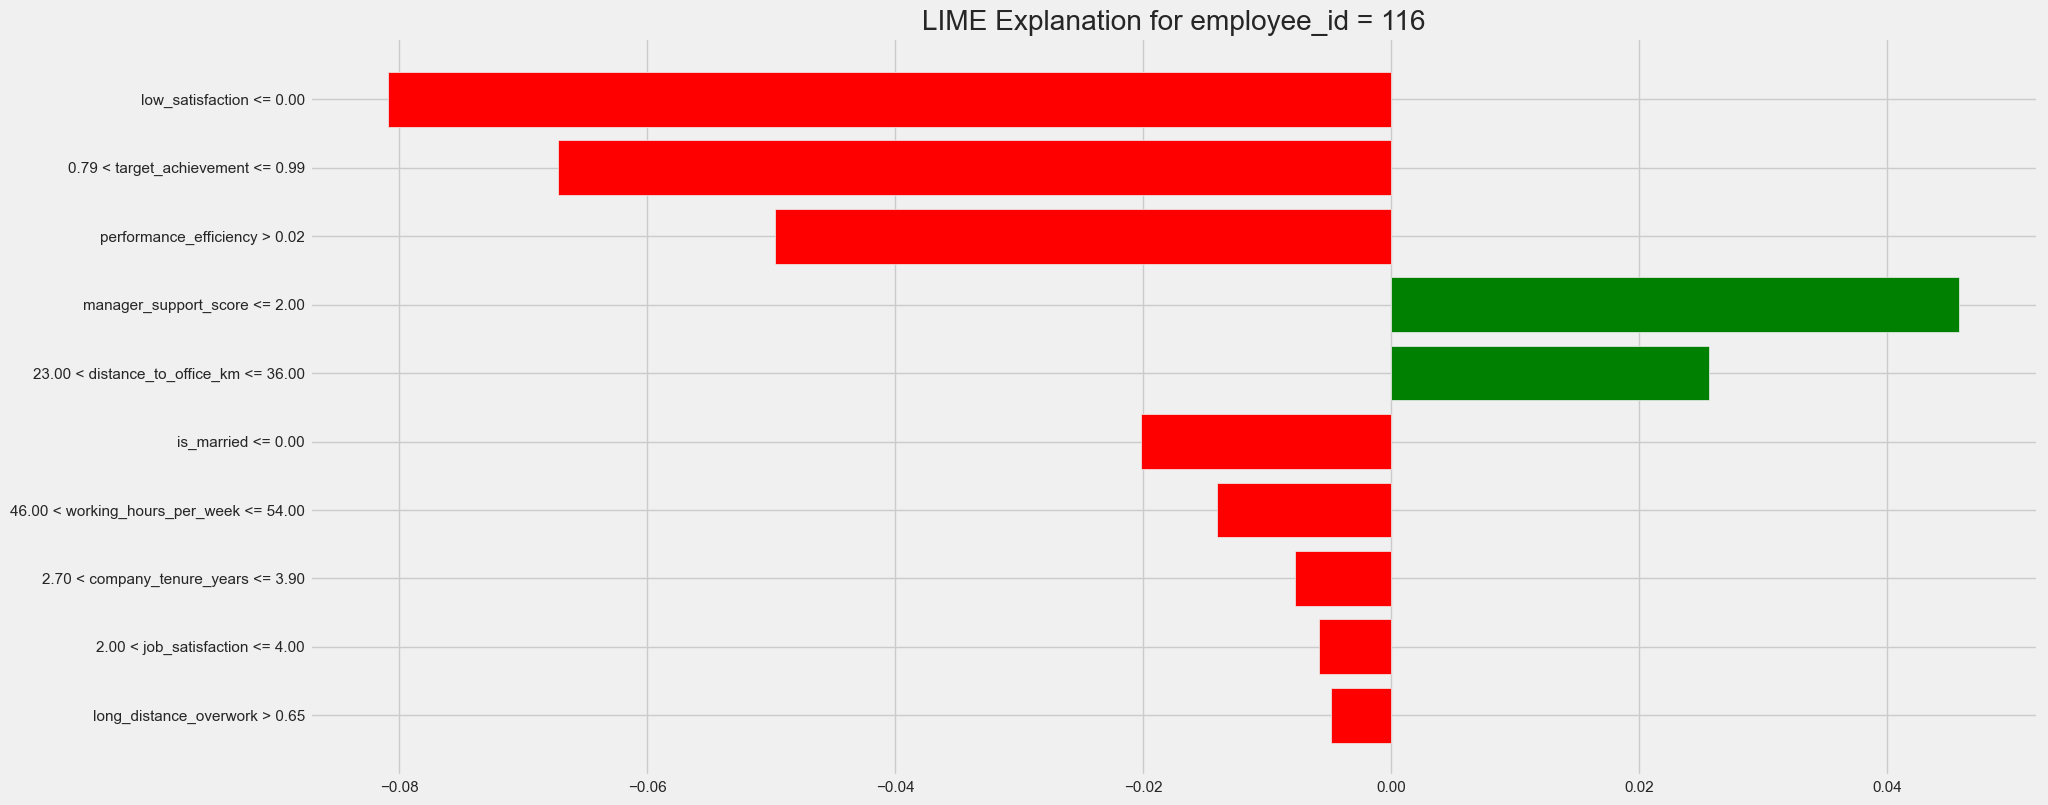

In [76]:
# !pip install lime
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. Setup LIME explainer
# =========================
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["Not Churn", "Churn"],
    mode="classification",
    discretize_continuous=True
)

# =========================
# 2. Pilih satu index karyawan
# =========================
idx = 116
print("Index:", idx, "| Label aktual:", "Churn" if y_test.iloc[idx]==1 else "Not Churn")

# =========================
# 3. Fungsi prediksi untuk LIME
# =========================
def lime_predict_proba(data):
    df = pd.DataFrame(data, columns=X_train.columns)
    return best_model_est.predict_proba(df)

# =========================
# 4. Generate penjelasan LIME
# =========================
exp = explainer_lime.explain_instance(
    X_test.iloc[idx].values,
    lime_predict_proba,
    num_features=10
)

# =========================
# 5. Tampilkan hanya grafik
# =========================
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for employee_id = {idx}")
plt.tight_layout()
plt.show()

# Bias & Fairness


In [77]:
X = df.drop('churn', axis=1)
y = df['churn']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [78]:
sensitive_cols_for_analysis = [
    'age_group',
    'gender',
    'education',
    'marital_status',
    'work_location'
]

In [79]:
X_features_for_model = df[selected_features].copy() # Using a new name to avoid confusion with global X
y_target_for_model = df[target_col].copy()

X_train_temp, X_test_correct, y_train_temp, y_test_correct = train_test_split(
    X_features_for_model, y_target_for_model,
    test_size=0.3,
    random_state=42,
    stratify=y_target_for_model # Use the correct y for stratification
)
# Now, X_test_correct has the exact features and order the model expects.
# And y_test_correct is its corresponding target.

def fairness_report(y_true, y_pred, X_sensitive, pos_label=1):
    """
    X_sensitive: DataFrame containing only the sensitive columns for fairness analysis.
                 Its index must align with y_true and y_pred.
    """
    results = {}

    for col in X_sensitive.columns:
        if X_sensitive[col].nunique() <= 1:
            print(f"Skipping fairness analysis for '{col}': only one unique value.")
            continue

        groups = X_sensitive[col].unique()
        group_metrics = {}

        for group in groups:
            mask = (X_sensitive[col] == group)

            # Filter y_true and y_pred based on the group mask
            y_true_g = y_true[mask]
            y_pred_g = y_pred[mask]

            if len(y_true_g) == 0:
                continue

            # Equal Opportunity: Recall per group
            recall = recall_score(y_true_g, y_pred_g, pos_label=pos_label, zero_division=0)

            # Predictive Equality: False Positive Rate
            tn, fp, fn, tp = confusion_matrix(y_true_g, y_pred_g, labels=[0, 1]).ravel()
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

            group_metrics[group] = {
                "support": mask.sum(),
                "recall (TPR)": recall,
                "FPR": fpr
            }

        # Hitung disparitas: max - min
        if group_metrics:
            recalls = [m["recall (TPR)"] for m in group_metrics.values()]
            fprs = [m["FPR"] for m in group_metrics.values()]

            results[col] = {
                "per_group": group_metrics,
                "recall_disparity": max(recalls) - min(recalls),
                "fpr_disparity": max(fprs) - min(fprs)
            }
        else:
            print(f"No groups found for fairness analysis of '{col}'.")

    return results

X_sensitive_original = df_original_sensitive.loc[X_test_correct.index]

X_sensitive = df.loc[X_test_correct.index, sensitive_cols_for_analysis]

y_pred = best_model_est.predict(X_test_correct)

fairness = fairness_report(y_test_correct, y_pred, X_sensitive)

# Tampilkan
for attr, res in fairness.items():
    print(f"\n=== Fairness: {attr} ===\n")
    print(f"Recall Disparitas: {res['recall_disparity']:.3f}")
    print(f"FPR Disparitas: {res['fpr_disparity']:.3f}")
    for group, metrics in res['per_group'].items():
        print(f"  {group}: Recall={metrics['recall (TPR)']:.3f}, FPR={metrics['FPR']:.3f} (Support: {metrics['support']})")


=== Fairness: age_group ===

Recall Disparitas: 0.070
FPR Disparitas: 0.182
  Senior: Recall=0.877, FPR=0.793 (Support: 86)
  Young: Recall=0.947, FPR=0.611 (Support: 93)
  Middle: Recall=0.931, FPR=0.639 (Support: 94)

=== Fairness: gender ===

Recall Disparitas: 0.010
FPR Disparitas: 0.018
  Female: Recall=0.914, FPR=0.680 (Support: 83)
  Male: Recall=0.924, FPR=0.662 (Support: 195)

=== Fairness: education ===

Recall Disparitas: 0.022
FPR Disparitas: 0.063
  Diploma: Recall=0.926, FPR=0.703 (Support: 105)
  High School: Recall=0.906, FPR=0.650 (Support: 93)
  Bachelor: Recall=0.927, FPR=0.640 (Support: 80)

=== Fairness: marital_status ===

Recall Disparitas: 0.035
FPR Disparitas: 0.161
  Single: Recall=0.907, FPR=0.712 (Support: 180)
  Married: Recall=0.942, FPR=0.552 (Support: 98)

=== Fairness: work_location ===

Recall Disparitas: 0.062
FPR Disparitas: 0.261
  Suburban: Recall=0.897, FPR=0.647 (Support: 92)
  Urban: Recall=0.951, FPR=0.761 (Support: 128)
  Rural: Recall=0.889,

We will now use this `df_processed` for subsequent model training steps, ensuring that only the engineered and relevant features are included.

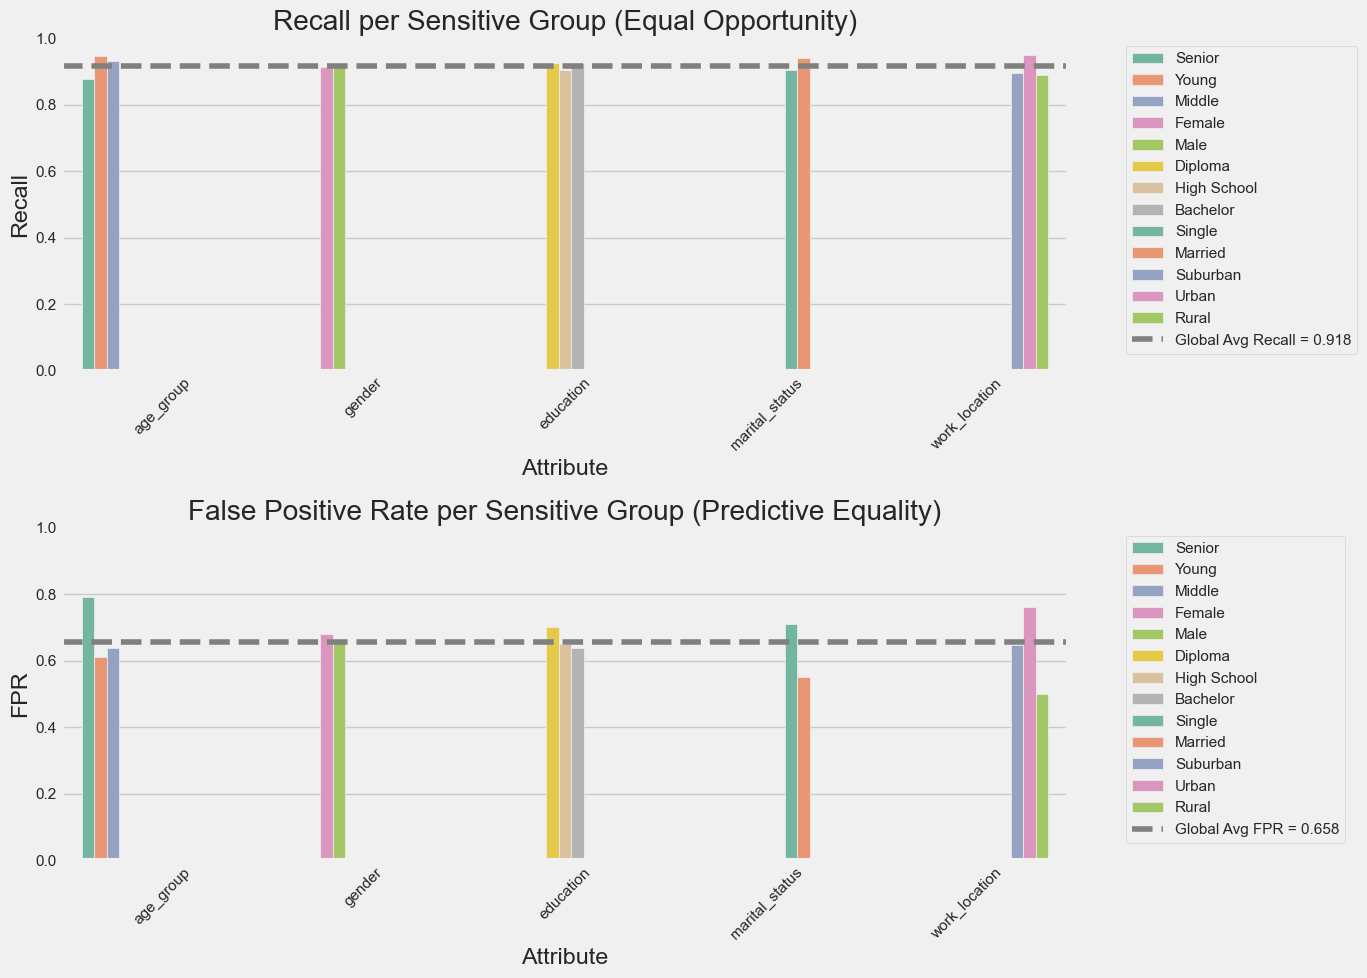

In [80]:
def plot_fairness_metrics(fairness_results):
    rows = []
    for attr, res in fairness_results.items():
        for group, met in res['per_group'].items():
            rows.append({
                "Attribute": attr,
                "Group": str(group),
                "Recall": met["recall (TPR)"],
                "FPR": met["FPR"],
                "Support": met["support"]
            })

    df_plot = pd.DataFrame(rows)

    # Hitung metrik global
    global_recall = df_plot["Recall"].mean()  # atau dari data asli
    global_fpr = df_plot["FPR"].mean()

    plt.figure(figsize=(14, 10))

    # === Plot Recall ===
    plt.subplot(2, 1, 1)
    ax1 = plt.gca()
    sns.barplot(data=df_plot, x="Attribute", y="Recall", hue="Group", palette="Set2", ax=ax1)
    plt.title("Recall per Sensitive Group (Equal Opportunity)")
    plt.ylim(0, 1)
    plt.axhline(y=global_recall, color='gray', linestyle='--', label=f'Global Avg Recall = {global_recall:.3f}')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # === Plot FPR ===
    plt.subplot(2, 1, 2)
    ax2 = plt.gca()
    sns.barplot(data=df_plot, x="Attribute", y="FPR", hue="Group", palette="Set2", ax=ax2)
    plt.title("False Positive Rate per Sensitive Group (Predictive Equality)")
    plt.ylim(0, 1)
    plt.axhline(y=global_fpr, color='gray', linestyle='--', label=f'Global Avg FPR = {global_fpr:.3f}')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

# Gunakan setelah fairness = fairness_report(...)
plot_fairness_metrics(fairness)

In [81]:
df_test = df.loc[X_test.index]
print(df_test.groupby('marital_status')['churn'].mean())

marital_status
Married    0.704082
Single     0.594444
Name: churn, dtype: float64


- Model over-prediksi churn → banyak lajang loyal dikira akan keluar

- Model under-prediksi churn → banyak karyawan menikah yang benar-benar akan keluar terlewat

In [82]:
print(df_test.groupby('age_group')['churn'].mean())

age_group
Young     0.612903
Middle    0.617021
Senior    0.662791
Name: churn, dtype: float64


In [83]:
print(df_test.groupby('work_location')['churn'].mean())

work_location
Rural       0.620690
Suburban    0.630435
Urban       0.640625
Name: churn, dtype: float64


In [84]:
print(df_test.groupby('gender')[['manager_support_score']].mean())

        manager_support_score
gender                       
Female               2.650602
Male                 2.528205


# Import Model

In [ ]:
from joblib import dump

# dump(best_model_est, "best_model.pkl")

['best_model.pkl']

In [88]:
feature_engineering = {
    "overtime_median": df["overtime_hours_per_week"].median()
}

dump(feature_engineering, "feature_engineering.pkl")

['feature_engineering.pkl']